### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Reading the dataset**

In [25]:
df1 = pd.read_csv("Traveldata_train.csv")

In [29]:
data1 = df1.copy()

In [30]:
data1.head()

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0

In [31]:
data1.tail()

ID Gender   Customer_Type   Age      Type_Travel Travel_Class  \
94374  98894375   Male  Loyal Customer  32.0  Business Travel     Business   
94375  98894376   Male  Loyal Customer  44.0  Business Travel     Business   
94376  98894377   Male             NaN  63.0  Business Travel     Business   
94377  98894378   Male  Loyal Customer  16.0  Personal Travel          Eco   
94378  98894379   Male  Loyal Customer  54.0              NaN          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
94374             1357                     83.0                  125.0  
94375              592                      5.0                   11.0  
94376             2794                      0.0                    0.0  
94377             2744                      0.0                    0.0  
94378             2107                     28.0                   28.0

### **Checking the data types of the columns**

In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


### **Checking for missing values**

In [33]:
missing_values = data.isnull().sum()
missing_values.sort_values(ascending=False)

Type_Travel                9226
Customer_Type              8951
Arrival_Delay_in_Mins       357
Gender                       77
Departure_Delay_in_Mins      57
Age                          33
ID                            0
Travel_Class                  0
Travel_Distance               0
dtype: int64

In [34]:
share_missing_values = missing_values/data.isnull().count()
share_missing_values.sort_values(ascending=False)

Type_Travel                0.097755
Customer_Type              0.094841
Arrival_Delay_in_Mins      0.003783
Gender                     0.000816
Departure_Delay_in_Mins    0.000604
Age                        0.000350
ID                         0.000000
Travel_Class               0.000000
Travel_Distance            0.000000
dtype: float64

In [35]:
df2 =pd.read_csv("Surveydata_train.csv")

In [36]:
data2 =df2.copy()

In [37]:
data2.head()

ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement               Good  Needs Improvement            Poor  
1               Poor  Needs Improvement               Good            Good  
2          Excellent               Good          Excellent       Excellent  
3         Acceptable               Good         Acceptable      Acceptable  
4               Good               Good               Good            Good

In [38]:
data2.tail()

ID  Overall_Experience       Seat_Comfort Seat_Class  \
94374  98894375                   0               Poor   Ordinary   
94375  98894376                   1               Good   Ordinary   
94376  98894377                   1  Needs Improvement  Green Car   
94377  98894378                   0  Needs Improvement   Ordinary   
94378  98894379                   0         Acceptable   Ordinary   

      Arrival_Time_Convenient           Catering  Platform_Location  \
94374                    Good               Good         Convenient   
94375                    Good               Good         Convenient   
94376       Needs Improvement  Needs Improvement  Needs Improvement   
94377                     NaN  Needs Improvement         Convenient   
94378                    Poor         Acceptable         Manageable   

      Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
94374                 Poor                  Poor           Poor   
94375    Needs Improvement             Excellent      Excellent   
94376                 Good             Excellent           Good   
94377                 Good     Needs Improvement           Good   
94378           Acceptable            Acceptable     Acceptable   

      Ease_of_Online_Booking Onboard_Service     Legroom Baggage_Handling  \
94374                   Poor            Good        Good             Good   
94375             Acceptable      Acceptable  Acceptable       Acceptable   
94376                   Good            Good        Good             Good   
94377                   Good      Acceptable        Good             Good   
94378             Acceptable            Poor        Good             Good   

         CheckIn_Service Cleanliness Online_Boarding  
94374  Needs Improvement        Good            Poor  
94375               Good  Acceptable            Good  
94376         Acceptable        Good      Acceptable  
94377               Good   Excellent            Good  
94378               Poor        Good      Acceptable

In [39]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [40]:
missing_values2 = data2.isnull().sum()
missing_values2.sort_values(ascending=False)

Arrival_Time_Convenient    8930
Catering                   8741
Onboard_Service            7601
Baggage_Handling            142
Online_Support               91
Legroom                      90
CheckIn_Service              77
Ease_of_Online_Booking       73
Seat_Comfort                 61
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Cleanliness                   6
Online_Boarding               6
Overall_Experience            0
Seat_Class                    0
ID                            0
dtype: int64

In [41]:
share_missing_values2 = missing_values2/data2.isnull().count()
share_missing_values2.sort_values(ascending=False)

Arrival_Time_Convenient    0.094619
Catering                   0.092616
Onboard_Service            0.080537
Baggage_Handling           0.001505
Online_Support             0.000964
Legroom                    0.000954
CheckIn_Service            0.000816
Ease_of_Online_Booking     0.000773
Seat_Comfort               0.000646
Platform_Location          0.000318
Onboard_Wifi_Service       0.000318
Onboard_Entertainment      0.000191
Cleanliness                0.000064
Online_Boarding            0.000064
Overall_Experience         0.000000
Seat_Class                 0.000000
ID                         0.000000
dtype: float64

# Joining two tables

In [42]:
df = data1.merge(data2, on='ID',how='left')

In [44]:
df.head().T

0                  1  \
ID                                98800001           98800002   
Gender                              Female               Male   
Customer_Type               Loyal Customer     Loyal Customer   
Age                                   52.0               48.0   
Type_Travel                            NaN    Personal Travel   
Travel_Class                      Business                Eco   
Travel_Distance                        272               2200   
Departure_Delay_in_Mins                0.0                9.0   
Arrival_Delay_in_Mins                  5.0                0.0   
Overall_Experience                       0                  0   
Seat_Comfort             Needs Improvement               Poor   
Seat_Class                       Green Car           Ordinary   
Arrival_Time_Convenient          Excellent          Excellent   
Catering                         Excellent               Poor   
Platform_Location          Very Convenient  Needs Improvement   
Onboard_Wifi_Service                  Good               Good   
Onboard_Entertainment    Needs Improvement               Poor   
Online_Support                  Acceptable               Good   
Ease_of_Online_Booking   Needs Improvement               Good   
Onboard_Service          Needs Improvement          Excellent   
Legroom                         Acceptable  Needs Improvement   
Baggage_Handling         Needs Improvement               Poor   
CheckIn_Service                       Good  Needs Improvement   
Cleanliness              Needs Improvement               Good   
Online_Boarding                       Poor               Good   

                                         2                  3  \
ID                                98800003           98800004   
Gender                              Female             Female   
Customer_Type               Loyal Customer     Loyal Customer   
Age                                   43.0               44.0   
Type_Travel                Business Travel    Business Travel   
Travel_Class                      Business           Business   
Travel_Distance                       1061                780   
Departure_Delay_in_Mins               77.0               13.0   
Arrival_Delay_in_Mins                119.0               18.0   
Overall_Experience                       1                  0   
Seat_Comfort             Needs Improvement         Acceptable   
Seat_Class                       Green Car           Ordinary   
Arrival_Time_Convenient  Needs Improvement  Needs Improvement   
Catering                 Needs Improvement                NaN   
Platform_Location        Needs Improvement  Needs Improvement   
Onboard_Wifi_Service     Needs Improvement         Acceptable   
Onboard_Entertainment                 Good  Needs Improvement   
Online_Support                   Excellent         Acceptable   
Ease_of_Online_Booking           Excellent         Acceptable   
Onboard_Service                  Excellent         Acceptable   
Legroom                          Excellent         Acceptable   
Baggage_Handling                 Excellent         Acceptable   
CheckIn_Service                       Good               Good   
Cleanliness                      Excellent         Acceptable   
Online_Boarding                  Excellent         Acceptable   

                                         4  
ID                                98800005  
Gender                              Female  
Customer_Type               Loyal Customer  
Age                                   50.0  
Type_Travel                Business Travel  
Travel_Class                      Business  
Travel_Distance                       1981  
Departure_Delay_in_Mins                0.0  
Arrival_Delay_in_Mins                  0.0  
Overall_Experience                       1  
Seat_Comfort                    Acceptable  
Seat_Class                        Ordinary  
Arrival_Time_Convenient         Acceptable  
Catering                     

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [47]:
share_missing_values = missing_values/df.isnull().count()
share_missing_values.sort_values(ascending=False)

Type_Travel                0.097755
Customer_Type              0.094841
Arrival_Time_Convenient    0.094619
Catering                   0.092616
Onboard_Service            0.080537
Arrival_Delay_in_Mins      0.003783
Baggage_Handling           0.001505
Online_Support             0.000964
Legroom                    0.000954
CheckIn_Service            0.000816
Gender                     0.000816
Ease_of_Online_Booking     0.000773
Seat_Comfort               0.000646
Departure_Delay_in_Mins    0.000604
Age                        0.000350
Platform_Location          0.000318
Onboard_Wifi_Service       0.000318
Onboard_Entertainment      0.000191
Cleanliness                0.000064
Online_Boarding            0.000064
Seat_Class                 0.000000
Overall_Experience         0.000000
Travel_Distance            0.000000
Travel_Class               0.000000
ID                         0.000000
dtype: float64

### **Converting the data types**

In [10]:
cols = data.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is an classification problem and the target variable is categorical
cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
# Changing the data type of object type column to category. hint use astype() function
for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyzing Summary Statistics of the dataset**

In [14]:
# Analyzing the summary statistics for numerical variables
data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Insights**
- it seems that the data is right skewed for all columns when we look at the 3rd quantile and the max value for
- Most of the loans seems to be quite low as the range between the 3rd quantile and the minimum value is between 11k and 23.3k. However, there must be higher loans for heavier investments as the maximum value is around 90k but it must be a few as the mean and median are quite close to each other.
- The maximum MORTDUE (amount due on the existing mortgage) 399k vs the maximum LOAN (amount of loean approved) 89.9k, it would mean that some customer made an additional loan on top of their first mortgage loan.
- There is a big gap in terms of type of property value as the average VALUE of the property is around 90k while the maximum value is around 900k.
- Most of the people are experienced professionals as the average of years at present job is 9 years.
- DEROG is really low if we look at the distribution as the 3rd quantile is 0 (which is a good sign). However, there are a few clients that had major derogatory reports as the maximum value is 10. We can see a similar pattern looking at DELINQ summary statistic numbers.
- CLAGE has definitely some outliers as the average is around 15 years while the maximum value is 97 years of credits.
- NINQ shows us that there are not so many recent credit inquiries in general but there are a few exception as the maximum value is 17
- Looking at CLNO it's interesting because here it means that on average, a customer has 21 existing credits, it's quite a lot! If we look at the maximum value it's 71 credits, this is huge!
- It's also interesting to look at DEBTINC as this KPI measure the ability of a customer to manage the monthly payments to repay the money they plan to borrow. The average is ~34% meaning, on average the monthly debt rerpesents ~34% of customer's income. There is a clear example of customers defaulting on their loan by looking at the maximum value 203 meaning that the monthly debt represents 3 times what the customer earn on a monthly basis.

In [15]:
# Checking summary for categorical data
data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights**
- It seems that most of the customers are not defaulting their loan as the top frequency is 0 and the frequency is 4771 meaning out of the meaning out of 5960 customers, 20% are defaulting on their loan (1 - (4771/5960)) and 80% paid it back.
- The number one reason of the loan are DebtCon meaning it's a debt consolidation, taking a new loan to pay off other liabilities and consumer debts
- With the current data structure we don't have much insight on JOB as the most occuring category is 'Other', we'll need to do some data adjustment on this one to get some insights.

**Let's look at the unique values in all the categorical variables**

In [16]:
# Checking the count of unique values in each categorical column 
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i])
    print('Nbr of missing values',cols_cat[i].isnull().sum())    
    print(cols_cat[i].value_counts())    
    print('*'*40)

Unique values in BAD are :
0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: category
Categories (2, int64): [0, 1]
Nbr of missing values 0
0    4771
1    1189
Name: BAD, dtype: int64
****************************************
Unique values in REASON are :
0       HomeImp
1       HomeImp
2       HomeImp
3           NaN
4       HomeImp
         ...   
5955    DebtCon
5956    DebtCon
5957    DebtCon
5958    DebtCon
5959    DebtCon
Name: REASON, Length: 5960, dtype: category
Categories (2, object): ['DebtCon', 'HomeImp']
Nbr of missing values 252
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
****************************************
Unique values in JOB are :
0        Other
1        Other
2        Other
3          NaN
4       Office
         ...  
5955     Other
5956     Other
5957     Other
5958     Other
5959     Other
Name: JOB, Length: 5960, dtype: category
Categories (6, object): ['M

**Insights**
- BAD is a flag column telling us whether or not a customer has defaulted on his/her loan with a 1 and if not it will be flagged as a 0. We don't have missing values in this column.
- REASON has two labels giving us information on the reason of the loan it's either for Debtcon has explained above or for HomeImp (home improvement). There are 252 missing values in this column.
- JOB give us information on the job of the customer. There are 6 categories: Manager, Office workers, Other, Professional Excecutive, Sales, Entrepreneur. We have more information on the most frequent jobs wihch are Professional Executive, Office Workers, and Managers. There 279 missing values in this column. 

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots                                        
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize,                                        
                                           ) # creating the 2 subplots
    print(col)
    print('Skew :', round(cols_not_cat[col].skew(), 2))
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.show()

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

In [18]:
cols_not_cat = data.select_dtypes(exclude=['category'])

In [19]:
cols_not_cat.columns

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')

LOAN
Skew : 2.02


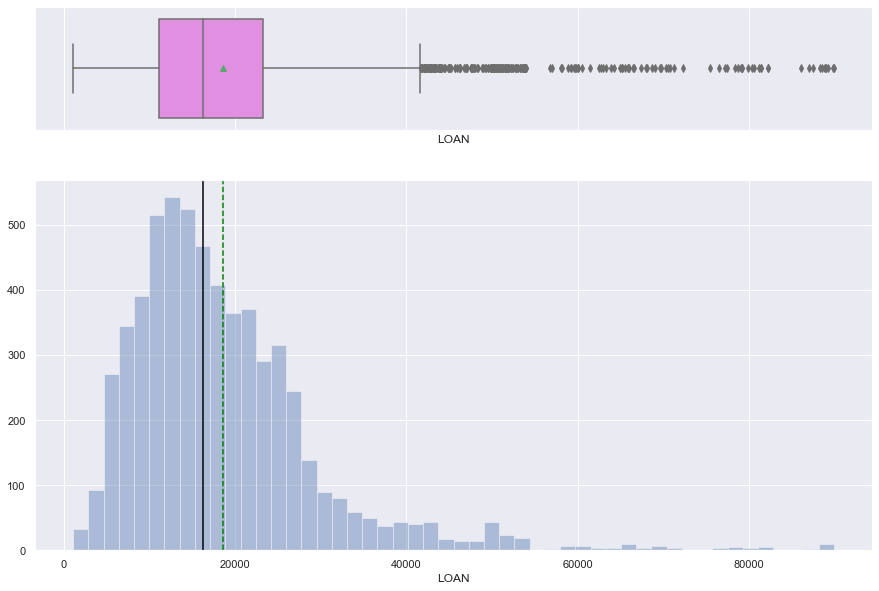

MORTDUE
Skew : 1.81


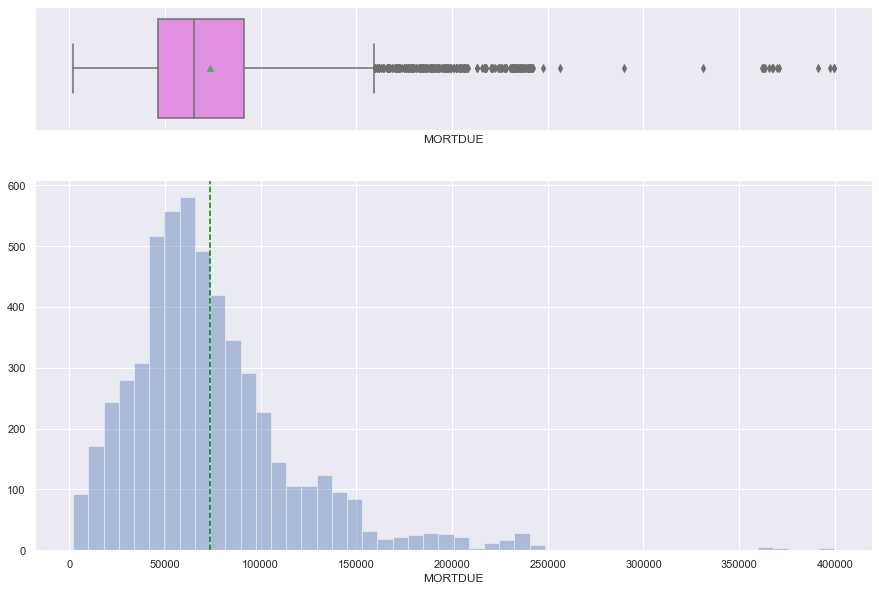

VALUE
Skew : 3.05


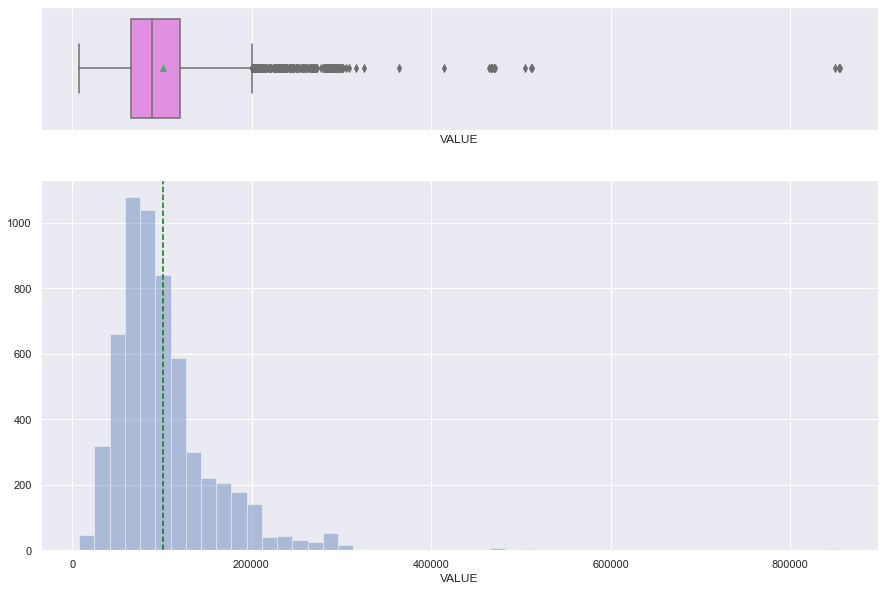

YOJ
Skew : 0.99


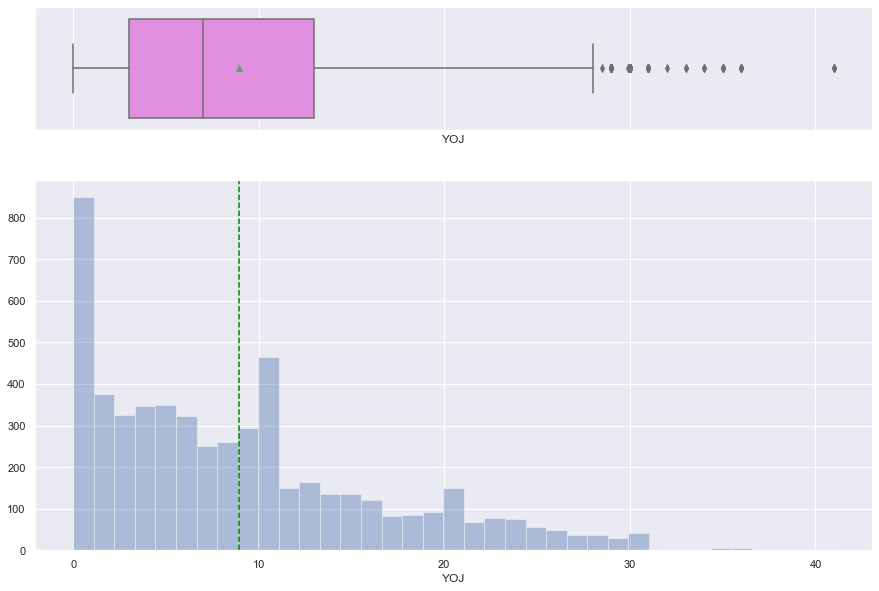

DEROG
Skew : 5.32


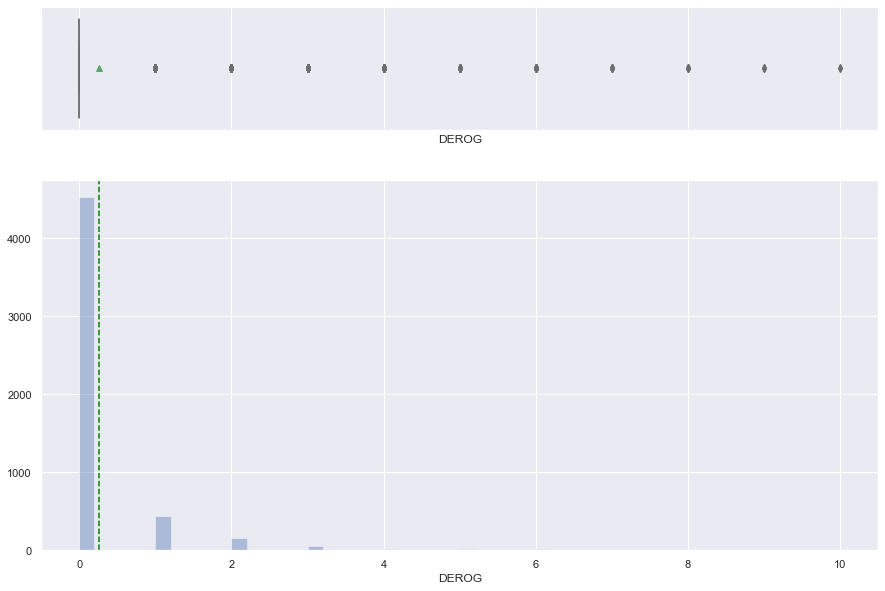

DELINQ
Skew : 4.02


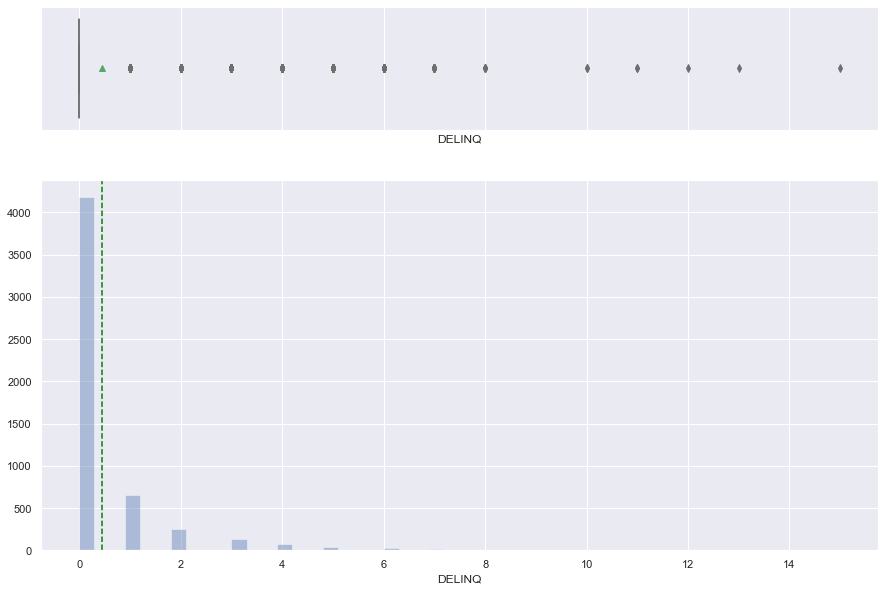

CLAGE
Skew : 1.34


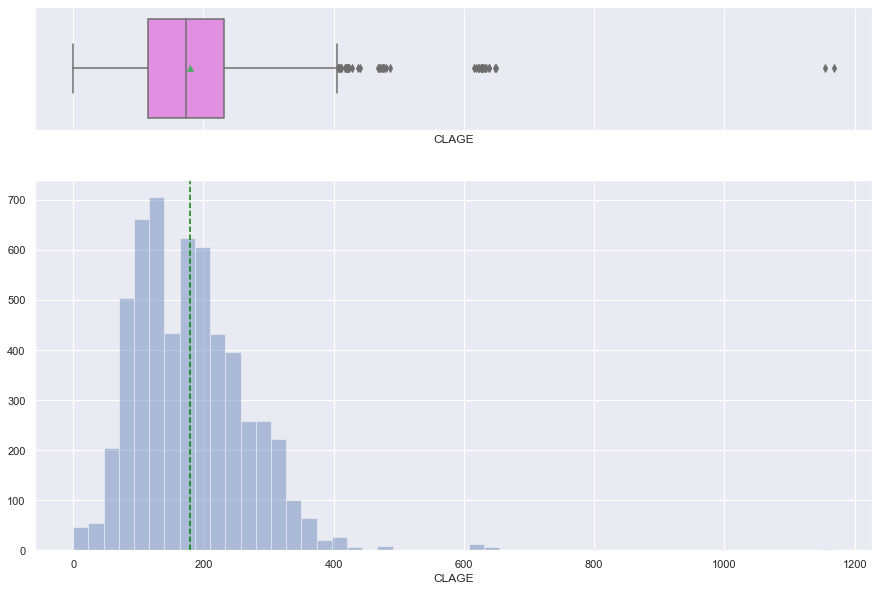

NINQ
Skew : 2.62


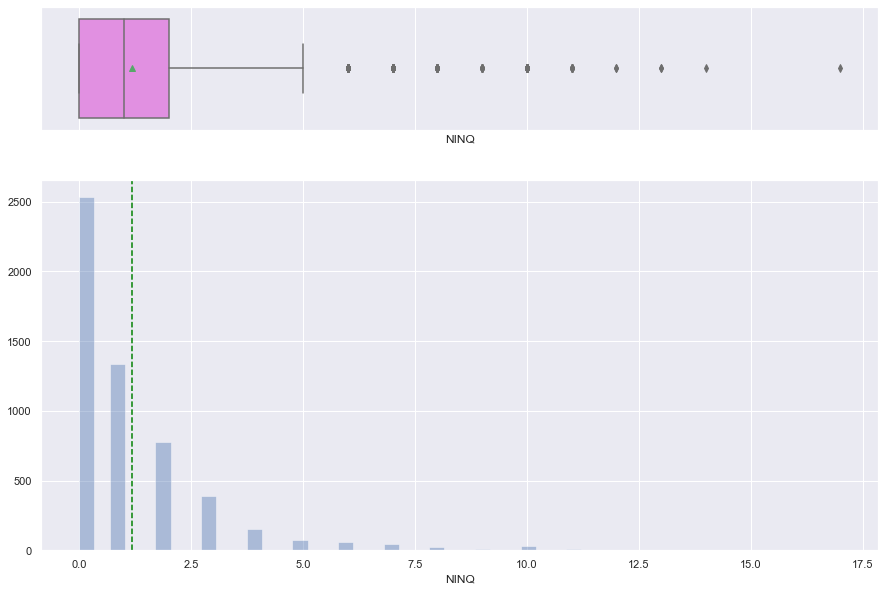

CLNO
Skew : 0.78


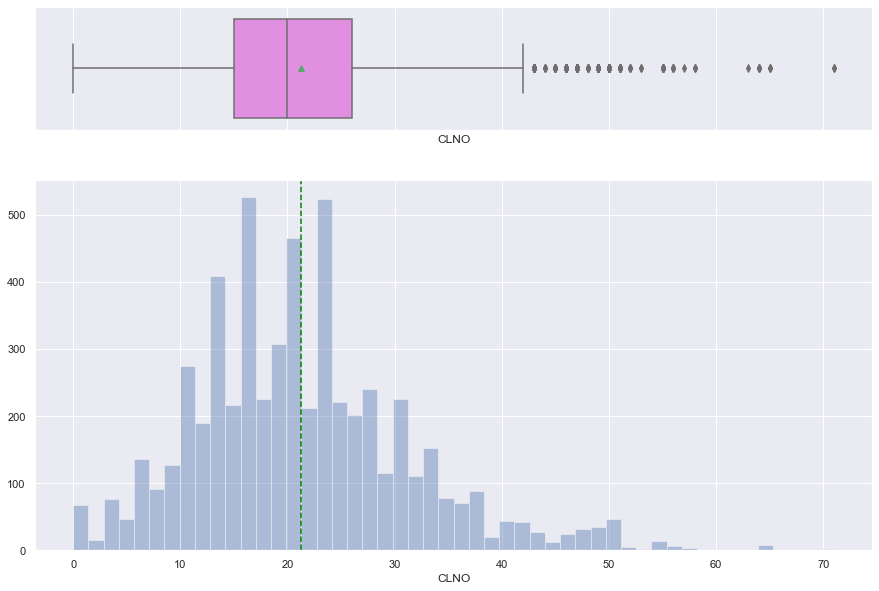

DEBTINC
Skew : 2.85


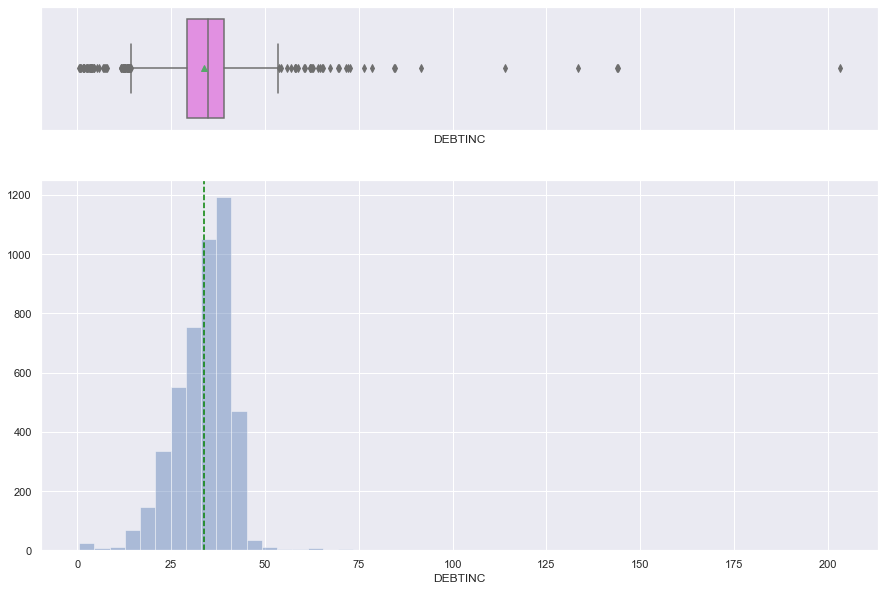

In [20]:
for col in cols_not_cat.columns:
    histogram_boxplot(cols_not_cat[col])

**Insights:**
- All non-categorical variables are right skewed. CLNO is the least right skewed where as DEROG is the highest right skewed
- LOAN, MORTDUE, VALUE, CLAGE, CLNO, and DEBYINC seem to have a normal distribution but also having outliers
- DEROG and DELINQ are highly skewed to the right, we don't even see a box plot for both. These two KPIs cover a similar topic so this is likely that they are corrolated
- YOJ, NINQ, DEROG, DELINQ have an exponential distribution

### **2. Univariate Analysis - Categorical Data**

In [21]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyzing Barplot for YOJ, NINQ, DEROG, DELINQ

In [22]:
cols_exponential_distrib = data[['YOJ', 'NINQ', 'DEROG', 'DELINQ']]

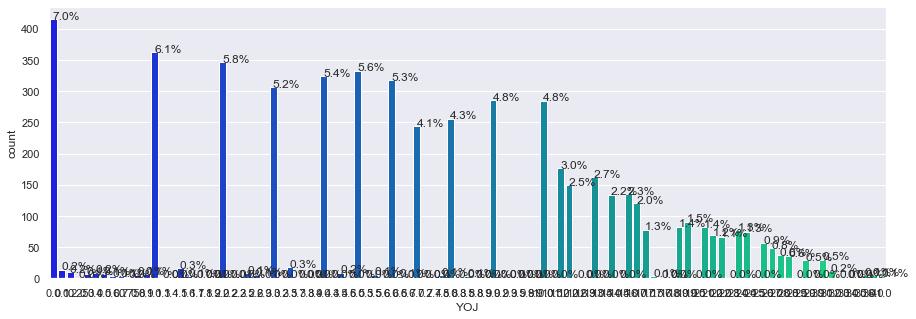

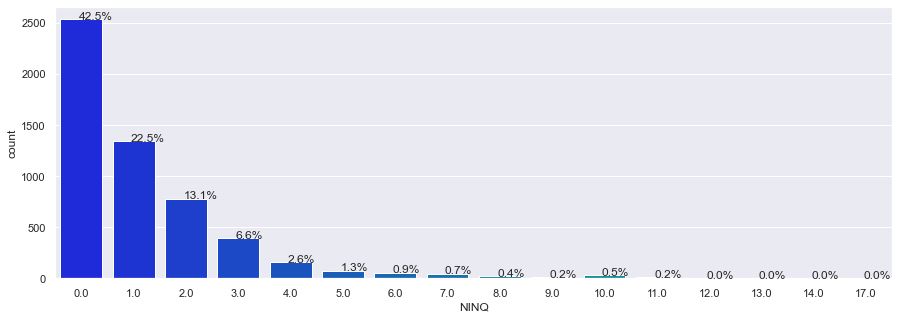

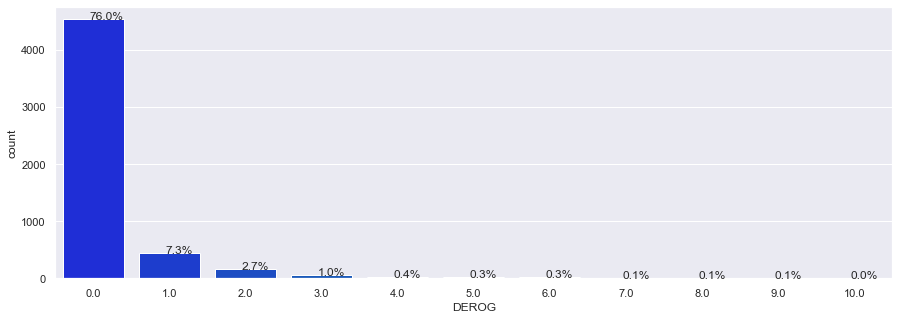

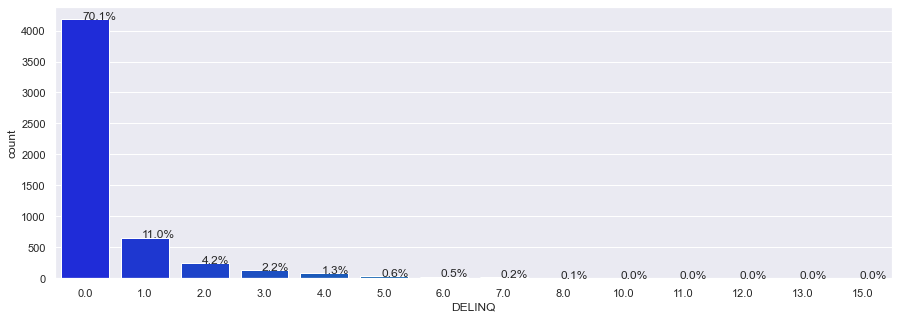

In [23]:
for col in cols_exponential_distrib.columns:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(cols_exponential_distrib[col],palette='winter')
    perc_on_bar(ax,cols_exponential_distrib[col])

**Insights:**
- **DELINQ** 70% customers are not delinquent credit lines, when customers are delinquent it can happens general between 1 or 4 times and then there is a long tail from that point
- **DEROG** 76% of customers are not seriously delinquency or late payments which is is aligned with the DELINQ distribution.
- **NINQ** the number of recent credit inquiries if there is one is generally between 1 and 5 then it is a long tail from that point
- **YOJ** even though this variable had an expontential distribution, we can't get insights from this point of view visualization

## **Bivariate Analysis**

#### Analyzing BAD vs non-categorical metrics

In [24]:
independent_variables = data.loc[:,data.columns != 'BAD']

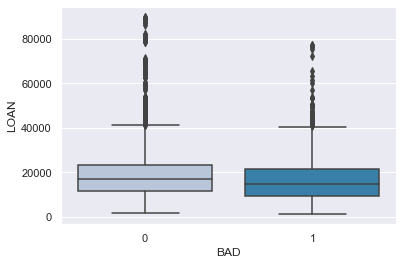

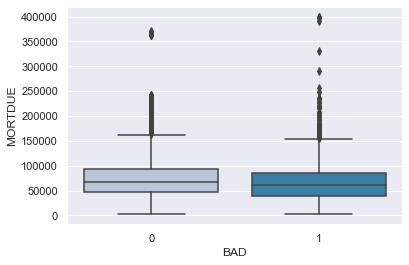

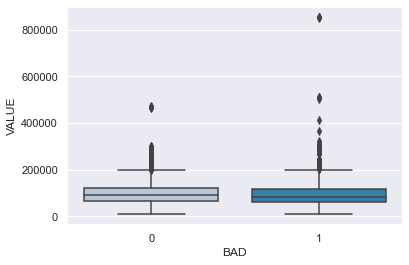

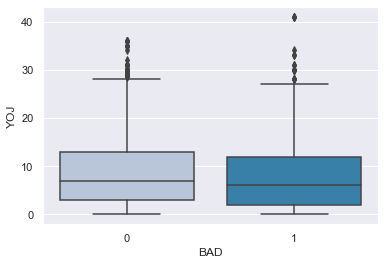

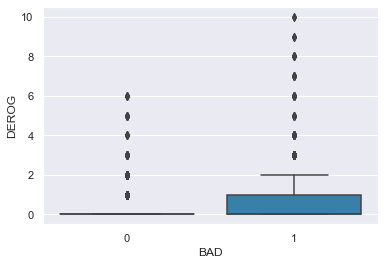

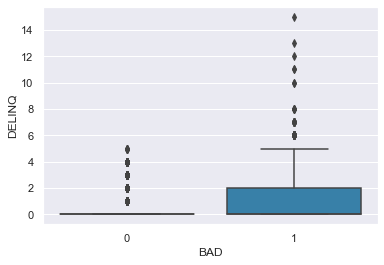

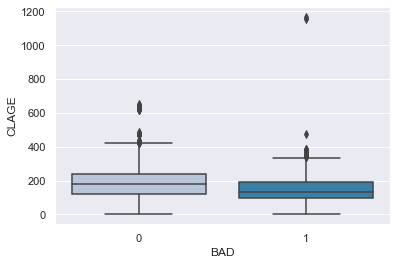

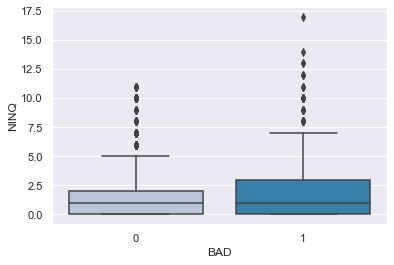

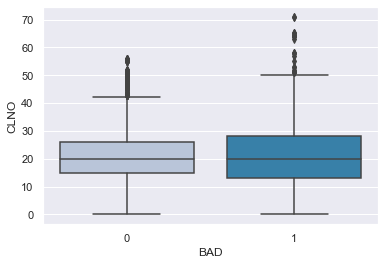

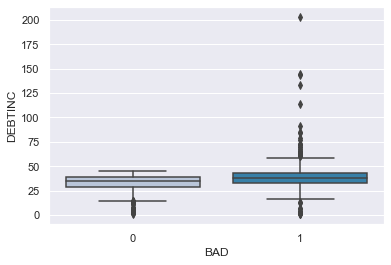

In [25]:
for col in cols_not_cat.columns:
    sns.boxplot(data["BAD"],cols_not_cat[col],palette="PuBu")
    plt.show()

**Insights**
- The bi-variate analysis between BAD and LOAN show two box plots that are relatively similar. The same observation can be seen with MORTDUE, VAUE, YOJ.
- We can see a greater range for DEROG, DELINQ, CLNO, NINQ, and DEBTINC when customer is defaulting (BAD == 1)

### **Bivariate Analysis: Two Continuous Variables**

In [26]:
cols_continuous = data.select_dtypes('float')

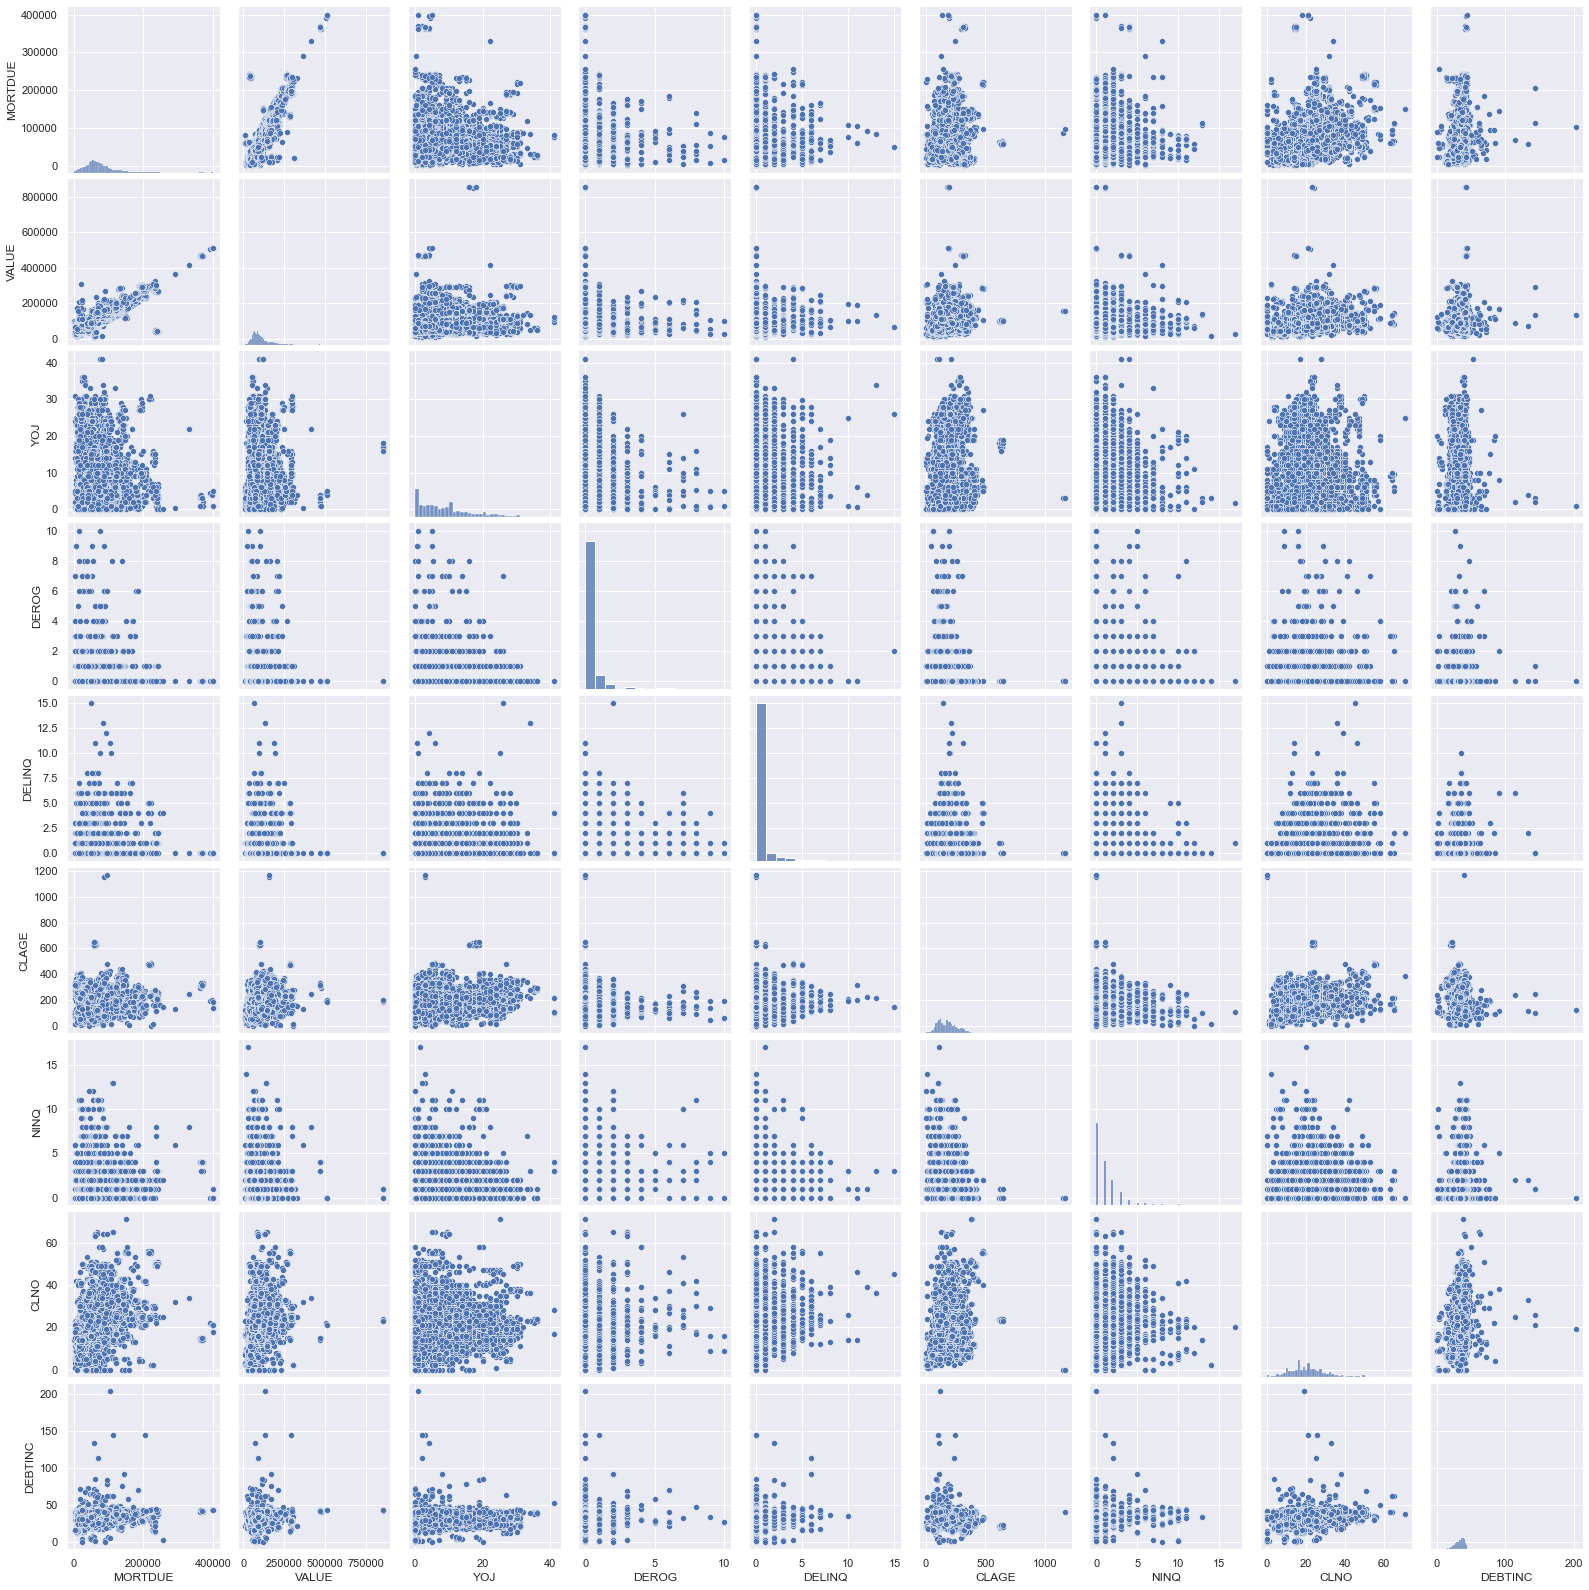

In [27]:
sns.pairplot(cols_continuous)

**Insights:**
- We can see a strong positive correlation between VALUE and MORTDUE
- A weak postive correlation can be seen between VALUE, CLNO

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [28]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    tab2 = pd.crosstab(x,data['BAD'],margins=True,normalize='index')
    print(tab1)
    print(tab2)    
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plotting stacked bar plot for for LOAN and REASON

In [29]:
cols_cat_no_bad = cols_cat[['JOB','REASON']]

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
BAD             0         1
JOB                        
Mgr      0.766623  0.233377
Office   0.868143  0.131857
Other    0.768007  0.231993
ProfExe  0.833856  0.166144
Sales    0.651376  0.348624
Self     0.699482  0.300518
All      0.794754  0.205246
------------------------------------------------------------------------------------------------------------------------


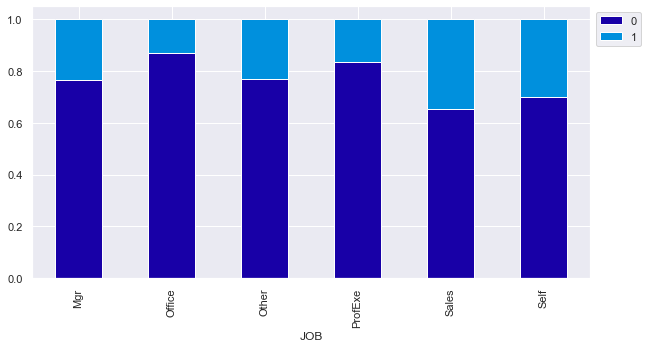

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
BAD             0         1
REASON                     
DebtCon  0.810336  0.189664
HomeImp  0.777528  0.222472
All      0.800105  0.199895
------------------------------------------------------------------------------------------------------------------------


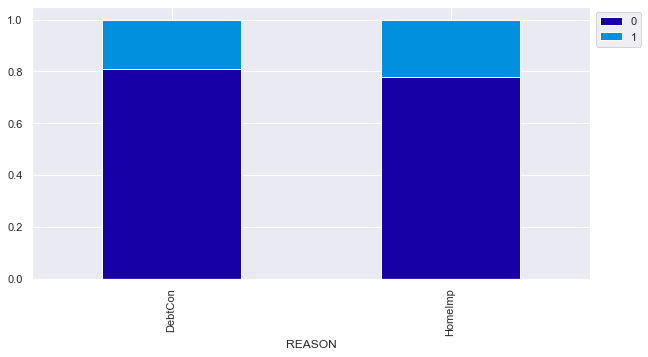

In [30]:
for col in cols_cat_no_bad.columns:
    stacked_plot(cols_cat_no_bad[col])
    plt.show()

**Insights**
- **REASON** - if we take ratio metrics so we can compare apple to apple, it seems that customers tend to default more when it's Home Improvement loan  as it represents 22% (396/1780) compared to DebtCon with 19% (745/3928)
- **JOB** - Again looking at ratio metrics, it seems that when a customer is defaulting Sales has the highest cases with ~35% followed by entrepreneurs ~30% and then office type of jobs around roughly ~23%

### **Multivariate Analysis**

#### Analyzing Correlation Heatmap for Numerical Variables

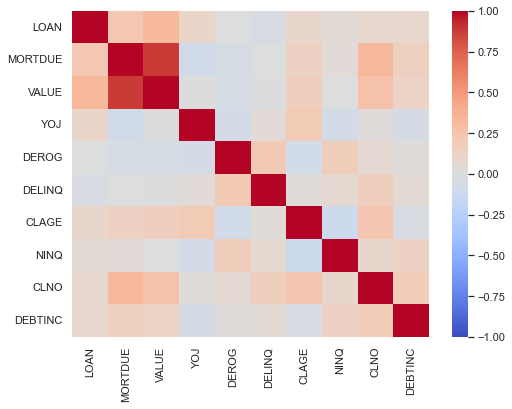

In [31]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Building correlation matrix for numerical columns
corr = data[numerical_col].corr()

# ploting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

**Insights**:
- We can see a strong positive correlation between MORTDUE and VALUE
- We can see postive correlations between VALUE and LOAN, MORTDUE and CLNO, CLAGE and CLNO, CLAGE and YOJ

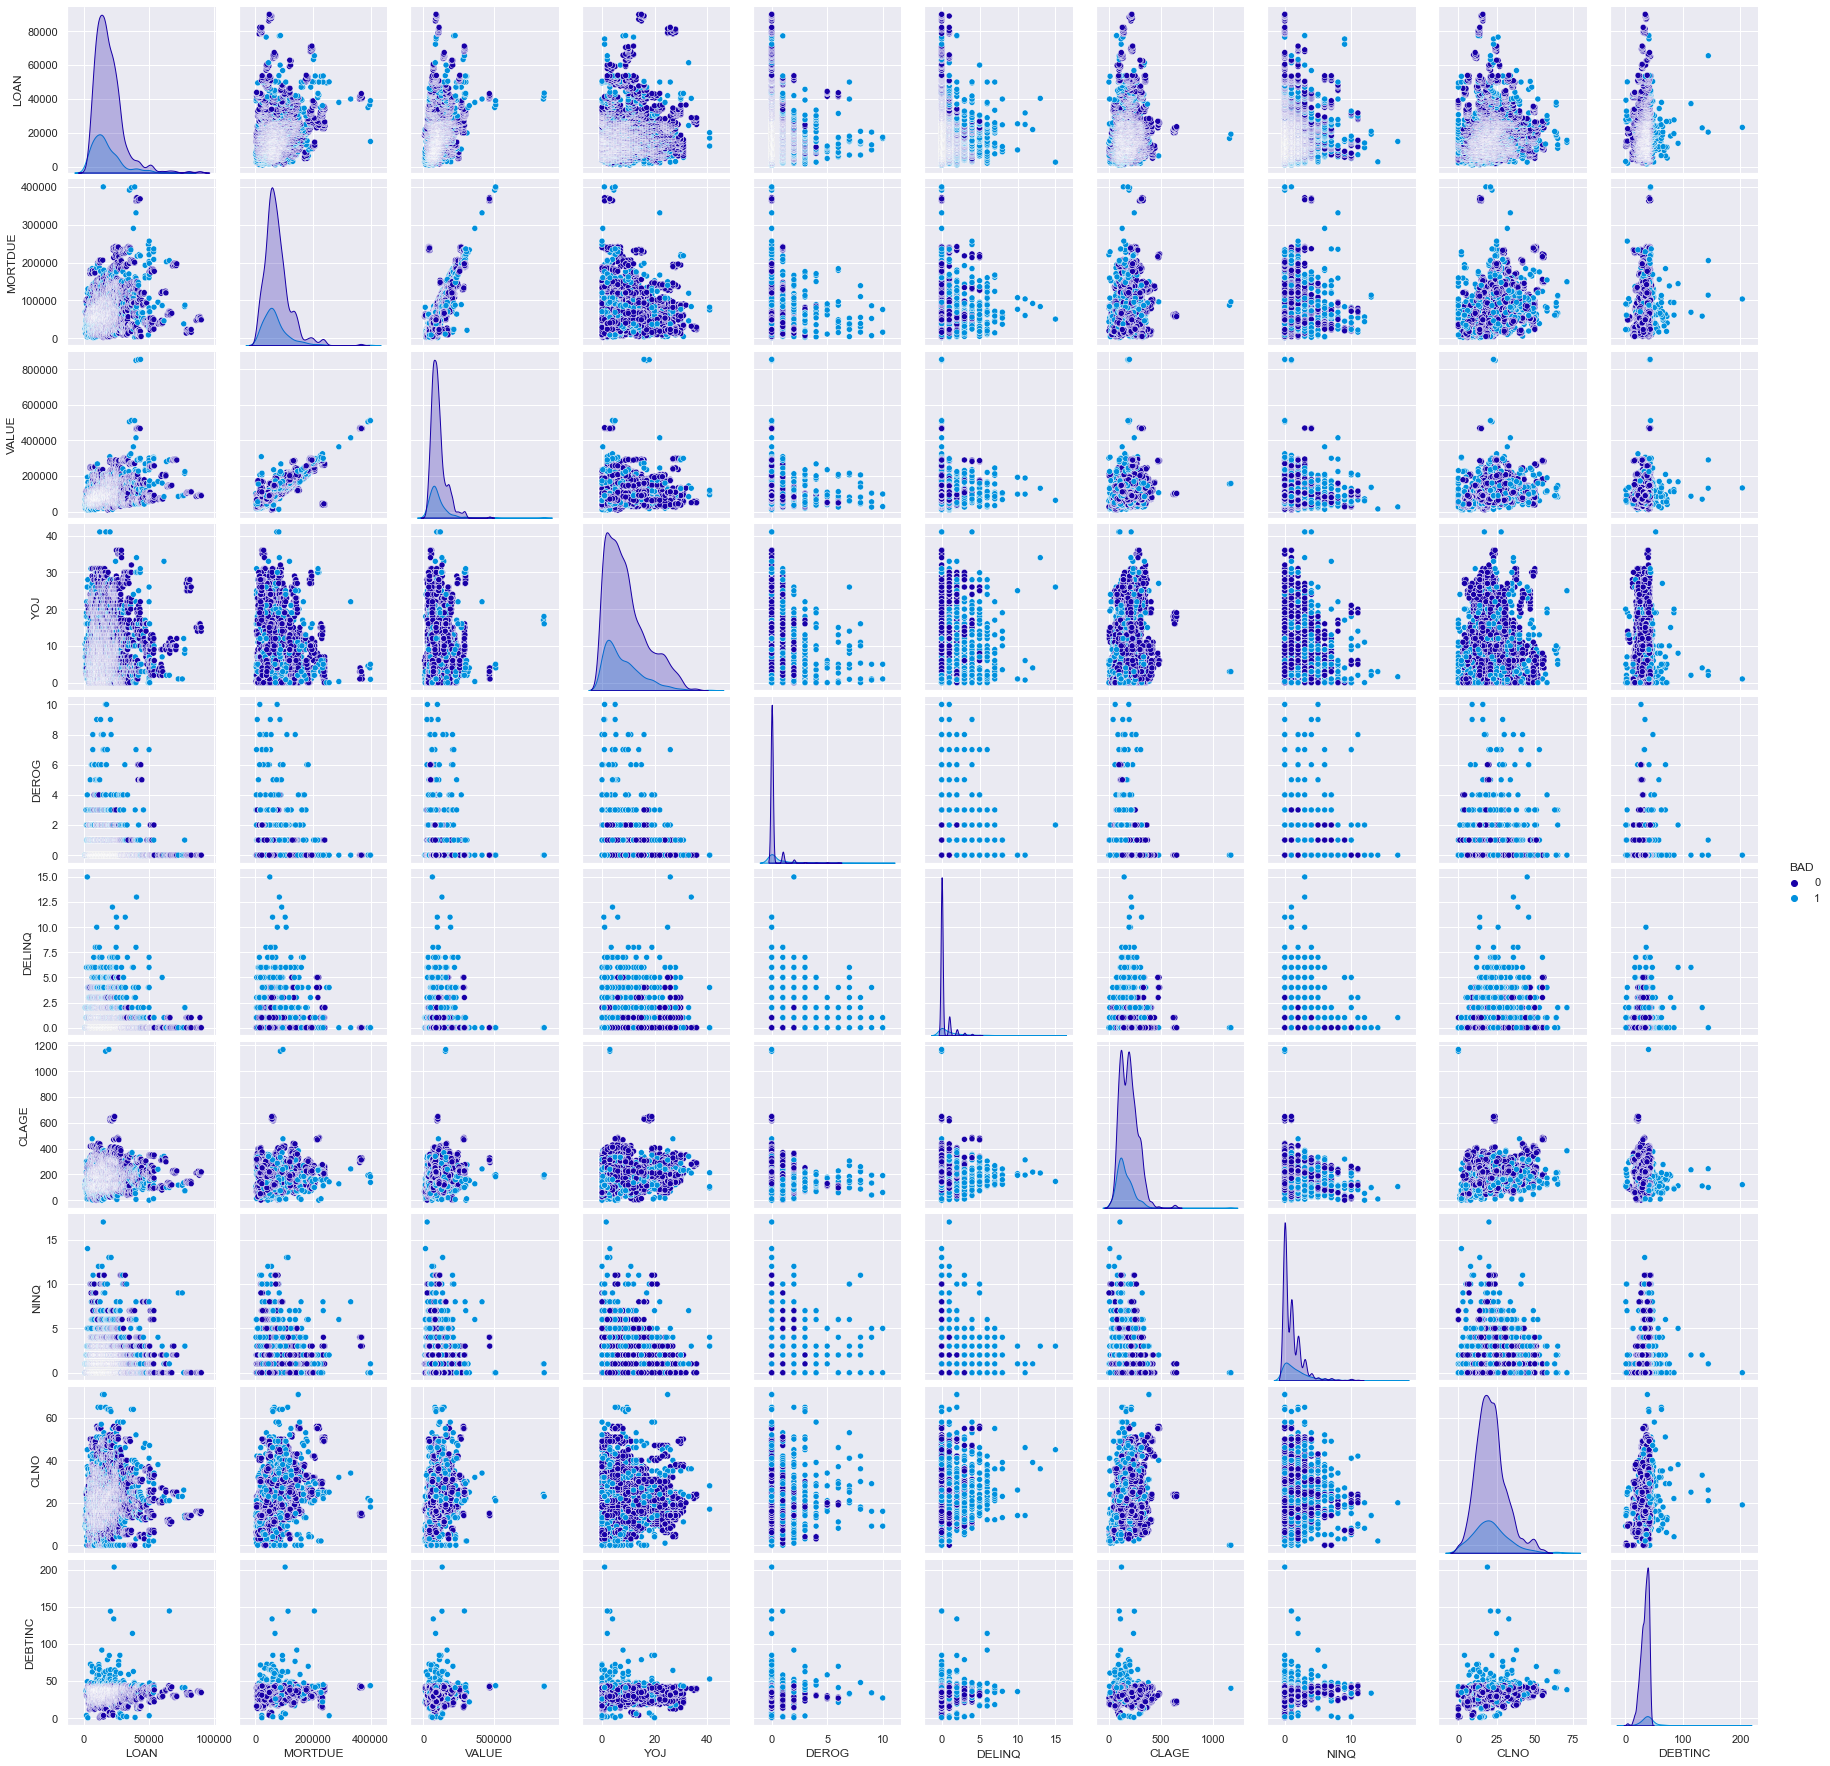

In [32]:
# Build pairplot for the data with hue = 'BAD'
sns.pairplot(data, hue='BAD')

#### Treating Outliers

In [4]:
def treat_outliers(df,col):
    '''
    treats outliers in a variable
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1-IQR*1.5  #define lower whisker
    Upper_Whisker = Q3+IQR*1.5  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                             # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [13]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist() # getting list of numerical columns


numerical_col_edited = []

for i in numerical_col:
    if i not in ('BAD','DEROG','DELINQ'): #removing DEROG & DELINQ as they are defaulting flags
        numerical_col_edited.append(i)
numerical_col_edited     

df = treat_outliers_all(df_raw,numerical_col_edited)

In [14]:
# without deliting the outlier on DEROG + DELINQ
df.describe().T

count          mean           std          min           25%  \
BAD      5960.0      0.199497      0.399656     0.000000      0.000000   
LOAN     5960.0  18051.895973   9252.565294  1100.000000  11100.000000   
MORTDUE  5442.0  71566.093752  37203.654400  2063.000000  46276.000000   
VALUE    5848.0  98538.057633  45070.800236  8000.000000  66075.500000   
YOJ      5445.0      8.873159      7.430914     0.000000      3.000000   
DEROG    5252.0      0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0      0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0    178.635811     80.495471     0.000000    115.116702   
NINQ     5450.0      1.093394      1.372692     0.000000      0.000000   
CLNO     5738.0     21.032851      9.420239     0.000000     15.000000   
DEBTINC  4693.0     33.681973      7.135236    14.345367     29.140031   

                  50%            75%            max  
BAD          0.000000       0.000000       1.000000  
LOAN     16300.000000   23300.000000   41600.000000  
MORTDUE  65019.000000   91488.000000  159306.000000  
VALUE    89235.500000  119824.250000  200447.375000  
YOJ          7.000000      13.000000      28.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278     406.230642  
NINQ         1.000000       2.000000       5.000000  
CLNO        20.000000      26.000000      42.500000  
DEBTINC     34.818262      39.003141      53.797805

#### Adding new columns in the dataset for each column which has missing values 

In [15]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary flag for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [16]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for column in missing_col:
    add_binary_flag(df,column)

In [17]:
df.head()

BAD    LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100.0  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300.0  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500.0  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500.0      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700.0  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  ...  VALUE_missing_values_flag  REASON_missing_values_flag  \
0   94.366667  ...                      False                       False   
1  121.833333  ...                      False                       False   
2  149.466667  ...                      False                       False   
3         NaN  ...                       True                        True   
4   93.333333  ...                      False                       False   

   JOB_missing_values_flag  YOJ_missing_values_flag  \
0                    False                    False   
1                    False                    False   
2                    False                    False   
3                     True                     True   
4                    False                    False   

   DEROG_missing_values_flag  DELINQ_missing_values_flag  \
0                      False                       False   
1                      False                       False   
2                      False                       False   
3                       True                        True   
4                      False                       False   

   CLAGE_missing_values_flag  NINQ_missing_values_flag  \
0                      False                     False   
1                      False                     False   
2                      False                     False   
3                       True                      True   
4                      False                     False   

   CLNO_missing_values_flag  DEBTINC_missing_values_flag  
0                     False                         True  
1                     False                         True  
2                     False                         True  
3                      True                         True  
4                     False                         True  

[5 rows x 24 columns]

In [18]:
df = df[df['DEBTINC_missing_values_flag']==False]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4693 entries, 5 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BAD                          4693 non-null   int64  
 1   LOAN                         4693 non-null   float64
 2   MORTDUE                      4291 non-null   float64
 3   VALUE                        4662 non-null   float64
 4   REASON                       4497 non-null   object 
 5   JOB                          4459 non-null   object 
 6   YOJ                          4264 non-null   float64
 7   DEROG                        4115 non-null   float64
 8   DELINQ                       4217 non-null   float64
 9   CLAGE                        4466 non-null   float64
 10  NINQ                         4277 non-null   float64
 11  CLNO                         4529 non-null   float64
 12  DEBTINC                      4693 non-null   float64
 13  MORTDUE_missing_va

#### Filling missing values in numerical columns with median and mode in categorical variables

In [20]:
num_data = df.select_dtypes('number')
# num_data.drop(columns="BAD",axis=1,inplace=True)
num_data

BAD     LOAN   MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  \
5       1   1700.0   30548.0   40320.0   9.0    0.0     0.0  101.466002   1.0   
7       1   1800.0   28502.0   43034.0  11.0    0.0     0.0   88.766030   0.0   
17      1   2200.0   23030.0       NaN  19.0    NaN     NaN         NaN   NaN   
19      0   2300.0  102370.0  120953.0   2.0    0.0     0.0   90.992533   0.0   
25      1   2400.0   34863.0   47471.0  12.0    0.0     0.0   70.491080   1.0   
...   ...      ...       ...       ...   ...    ...     ...         ...   ...   
5955    0  41600.0   57264.0   90185.0  16.0    0.0     0.0  221.808718   0.0   
5956    0  41600.0   54576.0   92937.0  16.0    0.0     0.0  208.692070   0.0   
5957    0  41600.0   54045.0   92924.0  15.0    0.0     0.0  212.279697   0.0   
5958    0  41600.0   50370.0   91861.0  14.0    0.0     0.0  213.892709   0.0   
5959    0  41600.0   48811.0   88934.0  15.0    0.0     0.0  219.601002   0.0   

      CLNO    DEBTINC  
5      8.0  37.113614  
7      8.0  36.884894  
17     NaN  14.345367  
19    13.0  31.588503  
25    21.0  38.263601  
...    ...        ...  
5955  16.0  36.112347  
5956  15.0  35.859971  
5957  15.0  35.556590  
5958  16.0  34.340882  
5959  16.0  34.571519  

[4693 rows x 11 columns]

In [21]:
# Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('object').columns.tolist()#df.select_dtypes('object')

# Filling numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Filling object columns with mode.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

In [22]:
data.describe().T

count           mean           std           min           25%  \
BAD      4693.0       0.085873      0.280206      0.000000      0.000000   
LOAN     4693.0   18622.288515   9062.030346   1700.000000  11800.000000   
MORTDUE  4693.0   72480.864692  35264.434576   4641.000000  49685.000000   
VALUE    4693.0  100024.598471  44402.615167  11702.000000  67950.000000   
YOJ      4693.0       8.763478      7.152097      0.000000      3.000000   
DEROG    4693.0       0.151076      0.610697      0.000000      0.000000   
DELINQ   4693.0       0.274451      0.803937      0.000000      0.000000   
CLAGE    4693.0     182.306710     78.475872      0.486711    119.859410   
NINQ     4693.0       0.888557      1.271592      0.000000      0.000000   
CLNO     4693.0      20.978479      9.084861      0.000000     15.000000   
DEBTINC  4693.0      33.681973      7.135236     14.345367     29.140031   

                  50%            75%            max  
BAD          0.000000       0.000000       1.000000  
LOAN     17000.000000   23600.000000   41600.000000  
MORTDUE  66938.000000   89765.000000  159306.000000  
VALUE    90756.500000  120859.000000  200447.375000  
YOJ          7.000000      12.000000      28.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      10.000000  
CLAGE      177.066137     232.118808     406.230642  
NINQ         0.000000       1.000000       5.000000  
CLNO        20.000000      26.000000      42.500000  
DEBTINC     34.818262      39.003141      53.797805

In [40]:
data.describe().T

count          mean           std          min           25%  \
LOAN     5960.0  18051.895973   9252.565294  1100.000000  11100.000000   
MORTDUE  5960.0  70997.067819  35597.710401  2063.000000  48139.000000   
VALUE    5960.0  98363.244470  44663.105774  8000.000000  66489.500000   
YOJ      5960.0      8.711300      7.122031     0.000000      3.000000   
DEROG    5960.0      0.224329      0.798458     0.000000      0.000000   
DELINQ   5960.0      0.405705      1.079256     0.000000      0.000000   
CLAGE    5960.0    178.368680     78.395960     0.000000    117.371430   
NINQ     5960.0      1.085403      1.312898     0.000000      0.000000   
CLNO     5960.0     20.994379      9.245170     0.000000     15.000000   
DEBTINC  5960.0     33.923529      6.348461    14.345367     30.763159   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   41600.000000  
MORTDUE  65019.000000   88200.250000  159306.000000  
VALUE    89235.500000  119004.750000  200447.375000  
YOJ          7.000000      12.000000      28.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     227.143058     406.230642  
NINQ         1.000000       2.000000       5.000000  
CLNO        20.000000      26.000000      42.500000  
DEBTINC     34.818262      37.949892      53.797805

In [41]:
data.head()

BAD    LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100.0  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300.0  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2   1  1500.0  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500.0  65019.0   89235.5      NaN     NaN   7.0    0.0     0.0   
4   0  1700.0  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO    DEBTINC  
0   94.366667   1.0   9.0  34.818262  
1  121.833333   0.0  14.0  34.818262  
2  149.466667   1.0  10.0  34.818262  
3  173.466667   1.0  20.0  34.818262  
4   93.333333   0.0  14.0  34.818262

## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?

The business problem is a classification problem as we want to know which borrower will default. Supervised learning through classification machine learning techniques must be explored. Our target variable is binary so our model needs to be a binary classifier. The number of classification ML techniques is reduced due to the fact that the model needs to be interpretable enough to provide justification for any loan rejections. In other words, some complex ML techniques such as Neural Networks won’t be satisfying this condition as we won’t be able to properly interpret the model.

As a result, we will explore the following ML techniques:
Logistic Regression
K-Nearest Neighbour / K-Nearest Centroid
Decision Tree
Random Forest (to benchmark the most important features using an ensemble learning technique of 100 of Decision Trees)

**2. Overall solution design** - What is the potential solution design?

- 1.Encode the categorical variables and potentially scale all variables as it’s a good practice in general.
- 2.Split the dataset differently between train and test sets in order to be able to evaluate the performance of each model on the train data using the same random seed. 
- 3.Check which variables are bringing more information to the model and remove potentially variables that are producing noise
- 4.Tune the Hyper-parameters when it’s possible
- 5.Benchmark the performance of each ML models and select the best performing model 

**3. Measures of success** - What are the key measures of success?


We want to minimise the number of defaulters. As a result, the model will need to predict accurately:

True Negatives   (TN) -> the model predicted the borrower will default and the borrower actually defaulted
False Negatives (FN) -> the model predicted the borrower won’t default but the borrower actually defaulted

In other words, the model will need to maximise Recall. Consequently, Recall will be our north star metrics for our model performance.

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

#### BAD breakdown

In [42]:
data['BAD'].value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

### **Separating the target variable from other variables**

In [43]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
# After several rounds of performance review, we decide to remove the below features to boost Logistic Regression model's performance
X = data.drop(columns = ['BAD'])

In [44]:
# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first = True)

In [45]:
# Create y(dependent varibale)
Y = data['BAD']

# Splitting the data

After having tested different Data Splits* in different notebooks, the models learned best using the 75% train 25% data split.
In different notebooks, the below split have been tested:

- 90% train set vs 10% test set
- 85% train set vs 15% test set
- 80% train set vs 20% test set
- 75% train set vs 25% test set
- 70% train set vs 30% test set

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance, there could be several times more negative samples than positive samples. In such cases, it is recommended to use the stratified sampling technique to ensure that relative class frequencies are approximately preserved in each train and validation fold. So we used stratification.

### **Splitting the data into 75% train and 25% test set**

In [46]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1, stratify = Y)

## **Model Evaluation Criterion**

**I changed the naming 'Not Eligible', 'Eligible' to 'Do not Default', 'Default'**

In [47]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Do not Default', 'Default'], yticklabels=['Do not Default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **MODEL 1 - Logistic Regression** 

In [48]:
# Defining the Logistic regression model
log_reg = LogisticRegression()

# Fitting the model on the training data 
log_reg.fit(X_train,y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3578
           1       0.59      0.02      0.03       892

    accuracy                           0.80      4470
   macro avg       0.70      0.51      0.46      4470
weighted avg       0.76      0.80      0.72      4470



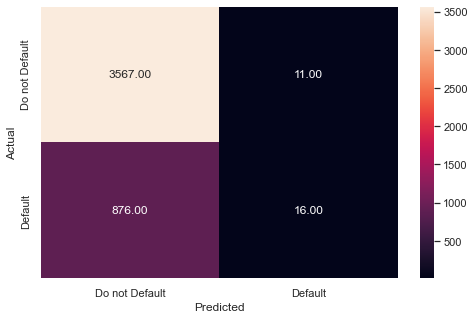

In [49]:
#Predict for train set
y_pred_train = log_reg.predict(X_train)

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

In [50]:
# Defining the Logistic regression model
log_reg = LogisticRegression()

# Fitting the model on the test data 
log_reg.fit(X_test,y_test)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1193
           1       0.71      0.06      0.11       297

    accuracy                           0.81      1490
   macro avg       0.76      0.53      0.50      1490
weighted avg       0.79      0.81      0.74      1490



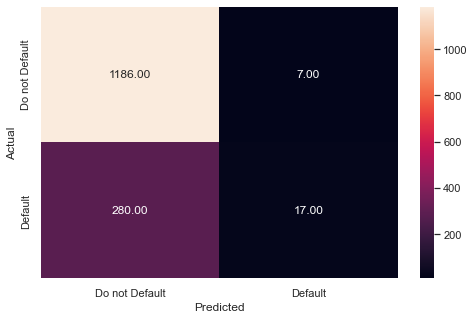

In [51]:
#Predict for test set
y_pred_test = log_reg.predict(X_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test)

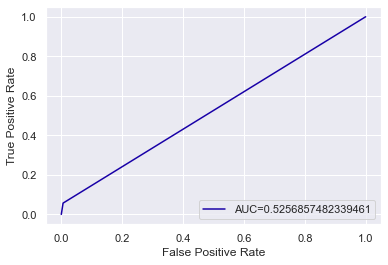

In [52]:
#define metrics
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_test)
auc = metrics.roc_auc_score(y_test, y_pred_test)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Observations:**

Side note, as we know there are 1189 borrowers/customers that defaulted on their loan, the new naming for the confusion matrix made more sense to me (922+19 in train dataset, 246+2 in test dataset)

Confusion Matrix (numbers provided for test dataset):
- **True Negative (TN):** Predicting the borrower won't default the loan and the borrower did not default the loan -> 1186
- **False Negative (FN):** Predicting the borrower won't default the loan but the borrower defaulted the loan -> 280
- **True Positive (TP):** Predicting the borrower will default the loan and the borrower defaulted the loan -> 17
- **False Positive (FP):** Predicting the borrower will default the loan and the borrower did not default the loan-> 7

Metric calculations:
- Accuracy = (TP + TN) / (TP + TN + FP + FN)               
--> 81%
---
- Recall = TP / (TP + FN)                                  
--> 6%
---
- Precision = TP / (TP + FP)                               
--> 71%
---
- F1-Score = 2 * Recall * Precision / (Recall + Precision) 
--> 11%

Area Under Curve (AUC) is a performance measurement for classifications problems, the nearer to 1 the better the model is at separating defaulters vs non-defaulters. Our current model has a AUC of 0.53 meaning it doesn't do a good job at classifying defaulters vs non-defaulters.

Logistic Regression with the current set up is not classifying correctly a lot of false negatives with the current set up.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [53]:
# Printing the coefficients of logistic regression
pd.Series(log_reg.coef_[0], index = X_train.columns).sort_values(ascending = False)

DEBTINC           2.232004e-02
CLNO              6.881491e-03
DELINQ            6.621160e-03
NINQ              5.697920e-03
DEROG             3.105086e-03
YOJ               1.720019e-03
JOB_Other         8.240871e-04
JOB_Self          2.102144e-04
JOB_Sales         1.723582e-04
MORTDUE          -7.913593e-07
VALUE            -2.864424e-06
LOAN             -3.024257e-05
REASON_HomeImp   -7.650102e-05
JOB_ProfExe      -1.048036e-04
JOB_Office       -9.203872e-04
CLAGE            -8.828667e-03
dtype: float64

**Insights**

**Observations:**

Feautres which positively affect on BAD = 1 / borrower will defaul:
                       
- DEBTINC
- CLNO
- DELINQ
- NINQ
- DEROG
- YOJ
- JOB_Other
- JOB_Self
- JOB_Sales

These features influence whether or not a borrower is likely to default

---

Features which negatively affect on BAD = 1 / borrower will default:

- MORTDUE
- VALUE
- LOAN
- REASON_HomeImp
- JOB_ProfExe
- JOB_Office
- CLAGE

These features influence whether or not a borrower is less likely to default

---

After having run the notebook several times, we have identified the most important features through Decision Tree and Random Forest feauture importance, lets see how it affect the Logistic Regression Model

In [54]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
# After several rounds of performance review, we decide to remove the below features to boost Logistic Regression model's performance
X = data.drop(columns = ['BAD','NINQ','JOB','REASON','VALUE','MORTDUE','LOAN']) 

In [55]:
# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first = True)

In [56]:
# Create y(dependent varibale)
Y = data['BAD']

In [57]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1, stratify = Y)

In [58]:
# Defining the Logistic regression model
log_reg = LogisticRegression()

# Fitting the model on the training data 
log_reg.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3578
           1       0.75      0.30      0.43       892

    accuracy                           0.84      4470
   macro avg       0.80      0.64      0.67      4470
weighted avg       0.83      0.84      0.81      4470



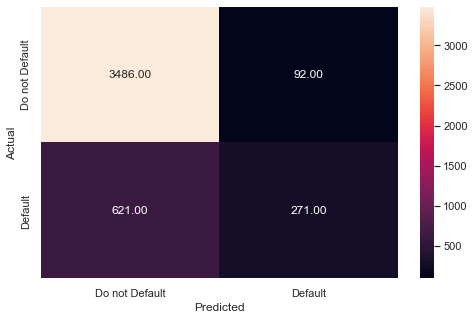

In [59]:
#Predict for train set
y_pred_train = log_reg.predict(X_train)

metrics_score(y_train, y_pred_train)

In [60]:
# Defining the Logistic regression model
log_reg = LogisticRegression()

# Fitting the model on the test data 
log_reg.fit(X_test,y_test)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1193
           1       0.70      0.26      0.37       297

    accuracy                           0.83      1490
   macro avg       0.77      0.61      0.64      1490
weighted avg       0.81      0.83      0.80      1490



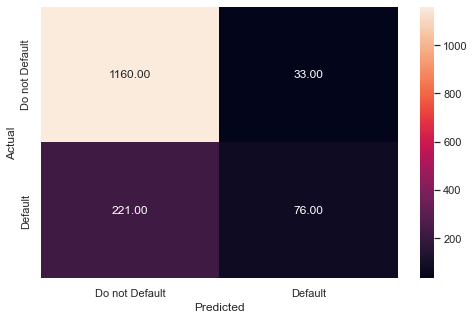

In [61]:
#Predict for test set
y_pred_test = log_reg.predict(X_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test)

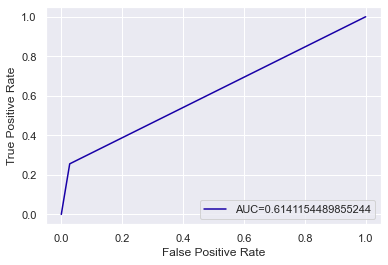

In [62]:
#define metrics
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_test)
auc = metrics.roc_auc_score(y_test, y_pred_test)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Observations:**

Confusion Matrix (numbers provided for test dataset):
- **True Negative (TN):** Predicting the borrower won't default the loan and the borrower did not default the loan -> 1160
- **False Negative (FN):** Predicting the borrower won't default the loan but the borrower defaulted the loan -> 221
- **True Positive (TP):** Predicting the borrower will default the loan and the borrower defaulted the loan -> 76
- **False Positive (FP):** Predicting the borrower will default the loan and the borrower did not default the loan-> 33

Metric calculations:
- Accuracy = (TP + TN) / (TP + TN + FP + FN)               
--> 83%
---
- Recall = TP / (TP + FN)                                  
--> 26%
---
- Precision = TP / (TP + FP)                               
--> 70%
---
- F1-Score = 2 * Recall * Precision / (Recall + Precision) 
--> 37%

Our current model has a higher AUC moving from 0.53 to 0.61, it has improved but it still doesn't do a good job at classifying defaulters vs non-defaulters.

Logistic Regression with the current set up is not classifying correctly a lot of false negatives with the current set up.

In [63]:
# Printing the coefficients of logistic regression
pd.Series(log_reg.coef_[0], index = X_train.columns).sort_values(ascending = False)

DELINQ     0.728318
DEROG      0.565058
DEBTINC    0.073744
YOJ        0.003119
CLAGE     -0.007187
CLNO      -0.019747
dtype: float64

**Insights**

**Observations:**

Feautres which positively affect on BAD = 1 / borrower will defaul:

- DELINQ          
- DEROG             
- DEBTINC             
- YOJ                       

These features influence whether or not a borrower is likely to default

---

Features which negatively affect on BAD = 1 / borrower will default:

- CLAGE
- CLNO

These features influence whether or not a borrower is less likely to default

---

Let's have a look at the F1-Score trend to see how precision and recall change according to the threshold.

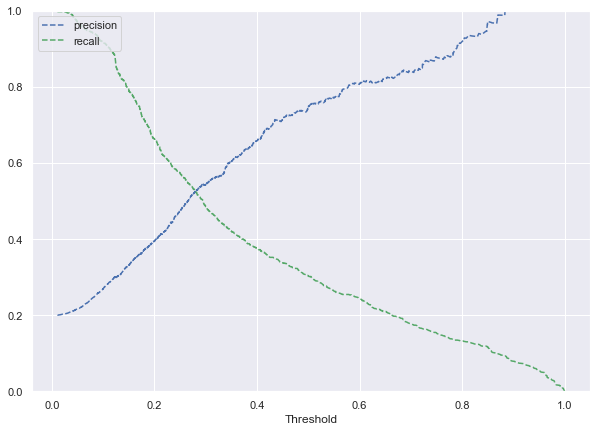

In [64]:
# predict_proba gives the probability of each observation belonging to each class
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

y_scores = log_reg.predict_proba(X_train) 

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

# Plotting values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')

plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observations:**
- As we can see on the Precision Recall scissor trend, we won't be able to get an good performance for recall without losing too much precision. Let's see that below

In [65]:
# Calculating the exact threshold where precision and recall are equal
for i in np.arange(len(thresholds)):
    if precisions[i] == recalls[i]:
        print(thresholds[i])

0.28005249740611704


**Observation:**
- We can see the breakeven point of precision and recall when the threshold is set to ~0.208

Let's plot the confusion matrices using this threshold value

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3578
           1       0.53      0.52      0.52       892

    accuracy                           0.81      4470
   macro avg       0.70      0.70      0.70      4470
weighted avg       0.81      0.81      0.81      4470



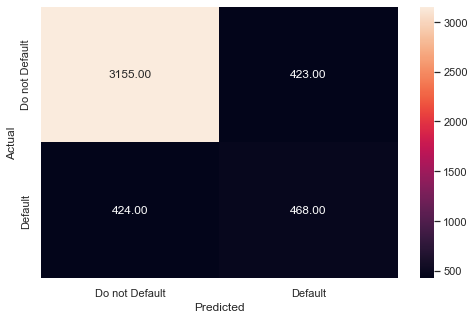

In [66]:
optimal_threshold = 0.28005249740611704

y_scores[:, 1] > optimal_threshold

metrics_score(y_train, y_scores[:, 1] > optimal_threshold)

In [67]:
# Defining the Logistic regression model
log_reg = LogisticRegression()

# Fitting the model on the test data 
log_reg.fit(X_test,y_test)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1193
           1       0.50      0.51      0.50       297

    accuracy                           0.80      1490
   macro avg       0.69      0.69      0.69      1490
weighted avg       0.80      0.80      0.80      1490



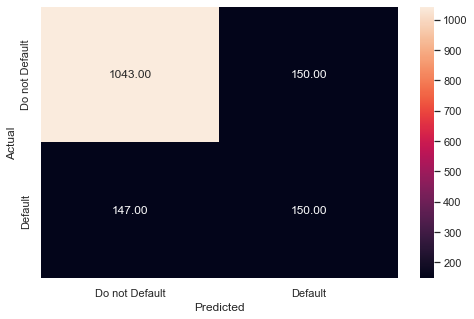

In [68]:
# Checking performance on the testing data
y_pred_test_log_reg_f1_score = log_reg.predict_proba(X_test)

metrics_score(y_test, y_pred_test_log_reg_f1_score[:, 1] > optimal_threshold)

**Observations:**

Confusion Matrix (numbers provided for test dataset):
- **True Negative (TN):** Predicting the borrower won't default the loan and the borrower did not default the loan -> 1043
- **False Negative (FN):** Predicting the borrower won't default the loan but the borrower defaulted the loan -> 147
- **True Positive (TP):** Predicting the borrower will default the loan and the borrower defaulted the loan -> 150
- **False Positive (FP):** Predicting the borrower will default the loan and the borrower did not default the loan-> 150

Metric calculations:
- Accuracy = (TP + TN) / (TP + TN + FP + FN)               
--> 80%
---
- Recall = TP / (TP + FN)                                  
--> 51%
---
- Precision = TP / (TP + FP)                               
--> 50%
---
- F1-Score = 2 * Recall * Precision / (Recall + Precision) 
--> 50%

Logistic Regression using F1-Score breakeven point classify better TP and FP.

Changing the threshold influenced drastically how logistic regression was classifying the records. 
- The model is not overfitting as the performance on both train and test datasets are quite similar
- Accuracy: 80% of our predictions were correct for whether a borrower will default or not
- Recall: 51% of actual positives (TP + FN), meaning predicting borrowers will default and they actualy defaulted (TP) + predicting borrowers won't default but borrowers actually defaulted (FN) were identified correctly
- Precision: 50% of positive identifications (TP + TN), meaning predicting borrowers who will default and they actually defaulted (TP) + predicting borrowers won't default and they actually did not default (TN) were actually correct

Even by using the optimal threshold, the metrics are not showing encouraging results that we could use for our business case. Also, we want to maximize recall first and then have a decent precision so the F1 method is not the right one to use.

Let's use other classification models to see what how different approach perform so that we can benchmark the different approaches.

### **MODEL 2 - K-Nearest Neighbors (K-NN)**

- K-NN is a distance-based algorithm and all distance-based algorithms are affected by the scale of the data.
- We will scale the attributes (DataFrame X defined above) before building the K-NN model.
- Then, we need to identify the value of K to be used in K-NN. We will use **GridSearchCV** to find the optimal value of K along with other hyperparameters.

In [69]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit_transform the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# Transform the testing data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) 

### KNN Tuning Hyperparameters

Using GridSearchCV to find the value of K and other hyperparameters

Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation.
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
Grid search is an exhaustive search of values that tries many iterations to compute the optimum values of hyperparameters.

The hyperparameters that we are tuning are:
- n_neighbors: Number of neighbors to use.
- weights={'uniform', 'distance'}
-- uniform : uniform weights. All points in each neighborhood are weighted equally.
-- distance : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors that are further away.
- p: When p = 1, this is equivalent to using Manhattan_distance (L1), and Euclidean_distance (L2) is used for p = 2.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

params_knn = {'n_neighbors':np.arange(2, 20), 'weights':['uniform','distance'], 'p':[1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(X_train_scaled,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=2, p=1, weights='distance')


In [71]:
# Fit the best estimator on the training data
knn_estimator.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3578
           1       1.00      0.99      1.00       892

    accuracy                           1.00      4470
   macro avg       1.00      1.00      1.00      4470
weighted avg       1.00      1.00      1.00      4470



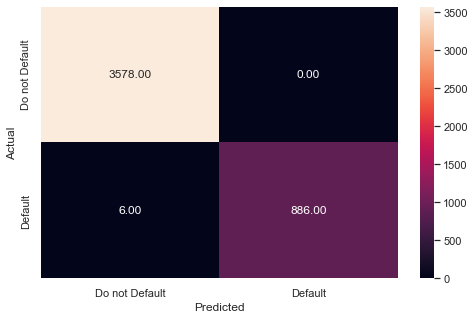

In [72]:
# Make predictions on the scaled training data and check the performance (using metrics_score function)
y_pred_train = knn_estimator.predict(X_train) 

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1193
           1       0.68      0.45      0.54       297

    accuracy                           0.85      1490
   macro avg       0.78      0.70      0.73      1490
weighted avg       0.83      0.85      0.84      1490



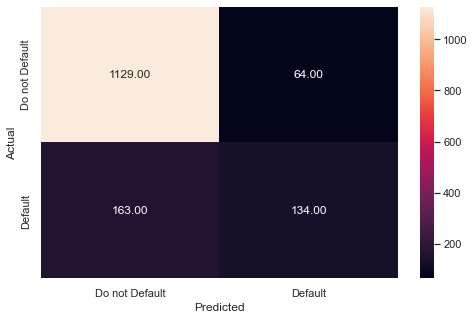

In [73]:
# Make predictions on the scaled testing data and check the performance (using metrics_score function)
y_pred_test =  knn_estimator.predict(X_test)

metrics_score(y_test, y_pred_test)

**Insights**:

Confusion Matrix (numbers provided for test dataset):
- **True Negative (TN):** Predicting the borrower won't default the loan and the borrower did not default the loan -> 1129
- **False Negative (FN):** Predicting the borrower won't default the loan but the borrower defaulted the loan -> 163
- **True Positive (TP):** Predicting the borrower will default the loan and the borrower defaulted the loan -> 134
- **False Positive (FP):** Predicting the borrower will default the loan and the borrower did not default the loan-> 64

Metric calculations:
- Accuracy = (TP + TN) / (TP + TN + FP + FN)               
--> 85%
---
- Recall = TP / (TP + FN)                                  
--> 45%
---
- Precision = TP / (TP + FP)                               
--> 68%
---
- F1-Score = 2 * Recall * Precision / (Recall + Precision) 
--> 54%

The model is clearly overfitting as on the train dataset we have 100% on all metrics and the same metrics' score decreased drastically on the test dataset.

Even though the accuracy of the model is 85%, the precision is good with 68%  but recall is low with 45%. Like Logistic Regression, the performance of the model is not sufficient for our business problem.

Let's try to see the performance of **KNearestCentroid.**

### **MODEL 3 - KNearest Centroid**

In [74]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit_transform the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# Transform the testing data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) 

## NearestCentroid Tuning Hyperparameters

The hyperparameters that we are tuning are:
- metric: The metric to use when calculating distance between instances
- - Euclidean: distance between two points in Euclidean space is the length of a line segment between the two points
- - Cosine: measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction
- schrink_threshold: Threshold for shring centroids to remove features
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

In [75]:
from sklearn.neighbors import NearestCentroid
knn = NearestCentroid()

params_knn = {'metric':['euclidean','cosine'],'shrink_threshold':[None,1,2,3,4,5]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(X_train_scaled,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

NearestCentroid(metric='cosine')


In [76]:
# Fit the best estimator on the training data
knn_estimator.fit(X_train, y_train)

NearestCentroid(metric='cosine')

              precision    recall  f1-score   support

           0       0.86      0.57      0.69      3578
           1       0.27      0.64      0.38       892

    accuracy                           0.59      4470
   macro avg       0.57      0.61      0.54      4470
weighted avg       0.75      0.59      0.63      4470



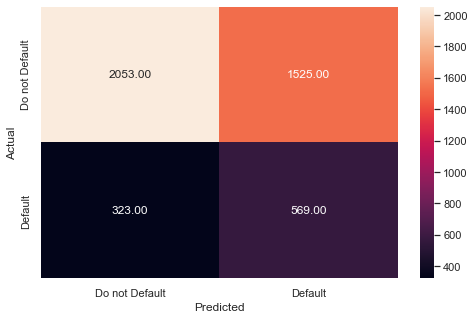

In [77]:
# Make predictions on the scaled training data and check the performance (using metrics_score function)
y_pred_train = knn_estimator.predict(X_train) 

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.87      0.56      0.68      1193
           1       0.28      0.67      0.39       297

    accuracy                           0.58      1490
   macro avg       0.57      0.62      0.54      1490
weighted avg       0.75      0.58      0.62      1490



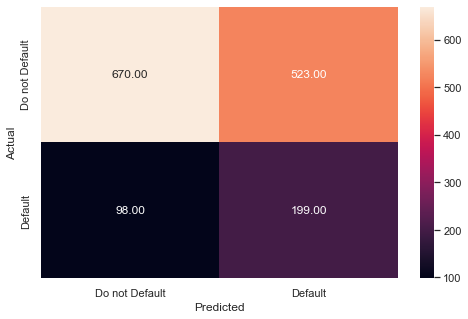

In [78]:
# Make predictions on the scaled testing data and check the performance (using metrics_score function)
y_pred_test =  knn_estimator.predict(X_test)

metrics_score(y_test, y_pred_test)

**Observations:**

Confusion Matrix (numbers provided for test dataset):
- **True Negative (TN):** Predicting the borrower won't default the loan and the borrower did not default the loan -> 670
- **False Negative (FN):** Predicting the borrower won't default the loan but the borrower defaulted the loan -> 98
- **True Positive (TP):** Predicting the borrower will default the loan and the borrower defaulted the loan -> 159
- **False Positive (FP):** Predicting the borrower will default the loan and the borrower did not default the loan-> 523

Metric calculations:
- Accuracy = (TP + TN) / (TP + TN + FP + FN)               
--> 58%
---
- Recall = TP / (TP + FN)                                  
--> 67%
---
- Precision = TP / (TP + FP)                               
--> 28%
---
- F1-Score = 2 * Recall * Precision / (Recall + Precision) 
--> 39%

Hyperparemeters tuning used the cosine method and shrnk_threshold 1 to optimize the classification.

However, KNearestCentroid has a much better performance compared to KNN when it comes to recall that is higher by 22% but Precision decreased drastically by 40% moving from 68% to 28%.

KNearestCentroid is the worst performing model so far for our business case as we want to maximize recall but we have really low accuracy and precision.

Let's investigate other models.

## **Model 4 - Decision Tree**

#### Separating the target variable y and independent variable x

In [79]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = data.drop(columns = ['BAD'])

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
Y = data['BAD']

#### Split the data 75% train dataset 25% test dataset

In [80]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1, stratify = Y)

In [81]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree =  DecisionTreeClassifier(random_state = 1)

In [82]:
#fitting Decision tree model
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3578
           1       1.00      1.00      1.00       892

    accuracy                           1.00      4470
   macro avg       1.00      1.00      1.00      4470
weighted avg       1.00      1.00      1.00      4470



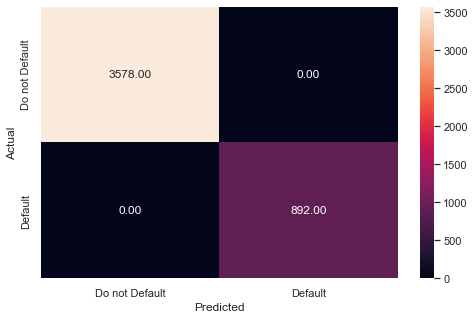

In [83]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1193
           1       0.69      0.65      0.67       297

    accuracy                           0.87      1490
   macro avg       0.80      0.79      0.80      1490
weighted avg       0.87      0.87      0.87      1490



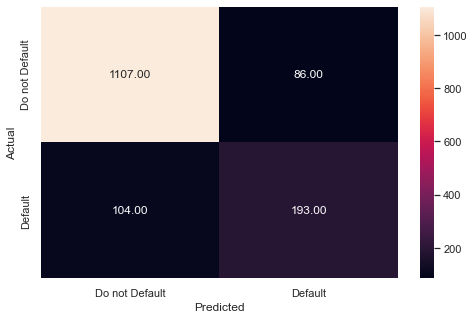

In [84]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Observations:**

Confusion Matrix (numbers provided for test dataset):
- **True Negative (TN):** Predicting the borrower won't default the loan and the borrower did not default the loan -> 1107
- **False Negative (FN):** Predicting the borrower won't default the loan but the borrower defaulted the loan -> 104
- **True Positive (TP):** Predicting the borrower will default the loan and the borrower defaulted the loan -> 193
- **False Positive (FP):** Predicting the borrower will default the loan and the borrower did not default the loan-> 86

Metric calculations:
- Accuracy = (TP + TN) / (TP + TN + FP + FN)               
--> 87%
---
- Recall = TP / (TP + FN)                                  
--> 65%
---
- Precision = TP / (TP + FP)                               
--> 69%
---
- F1-Score = 2 * Recall * Precision / (Recall + Precision) 
--> 67%

The model is clearly overfitting the train dataset as we have 100% on all performance metrics and there is a big decrease in performance on the test dataset. This is expected for deceision trees in general before using pruning techniques.

The accuracy of 87% is way higher than any previous model. The same trend can be observed on Recall and Precision that are around 67% 

Let's add lass_weight={0: 0.2, 1: 0.8} to see if we can improve the performance of the model.

In [85]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1,stratify = Y)

In [86]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree_class_weight =  DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8},random_state = 1)

In [87]:
#fitting Decision tree model
d_tree_class_weight.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3578
           1       1.00      1.00      1.00       892

    accuracy                           1.00      4470
   macro avg       1.00      1.00      1.00      4470
weighted avg       1.00      1.00      1.00      4470



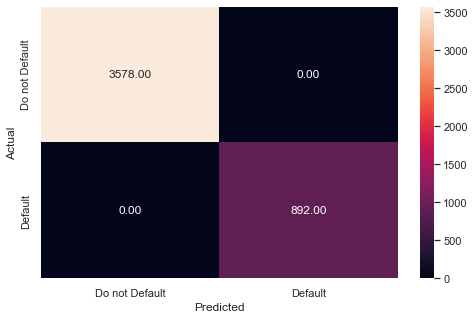

In [88]:
# Checking performance on the training data
y_pred_train1 = d_tree_class_weight.predict(X_train)

metrics_score(y_train, y_pred_train1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1193
           1       0.68      0.64      0.66       297

    accuracy                           0.87      1490
   macro avg       0.79      0.78      0.79      1490
weighted avg       0.86      0.87      0.87      1490



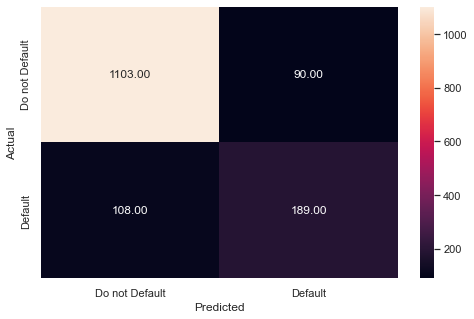

In [89]:
# Checking performance on the testing data
y_pred_test1 = d_tree_class_weight.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Insights**:

Adding lass_weight={0: 0.2, 1: 0.8} did not necessarily improved the performance of our decision tree model.

Confusion Matrix (numbers provided for test dataset):
- **True Negative (TN):** Predicting the borrower won't default the loan and the borrower did not default the loan -> 1103
- **False Negative (FN):** Predicting the borrower won't default the loan but the borrower defaulted the loan -> 108
- **True Positive (TP):** Predicting the borrower will default the loan and the borrower defaulted the loan -> 189
- **False Positive (FP):** Predicting the borrower will default the loan and the borrower did not default the loan-> 90

Metric calculations:
- Accuracy = (TP + TN) / (TP + TN + FP + FN)               
--> 87%
---
- Recall = TP / (TP + FN)                                  
--> 64%
---
- Precision = TP / (TP + FP)                               
--> 68%
---
- F1-Score = 2 * Recall * Precision / (Recall + Precision) 
--> 66%

Similarly, the model is clearly overfitting the train dataset as we have 100% on all performance metrics and there is a big decrease in performance on the test dataset. Once again, we still did not apply pruning techniques.

Accuracy is the same, Recall and Precision decreased by adding the class weight.

Let's have a look at the feautre importance of the tree

<AxesSubplot:xlabel='Importance'>

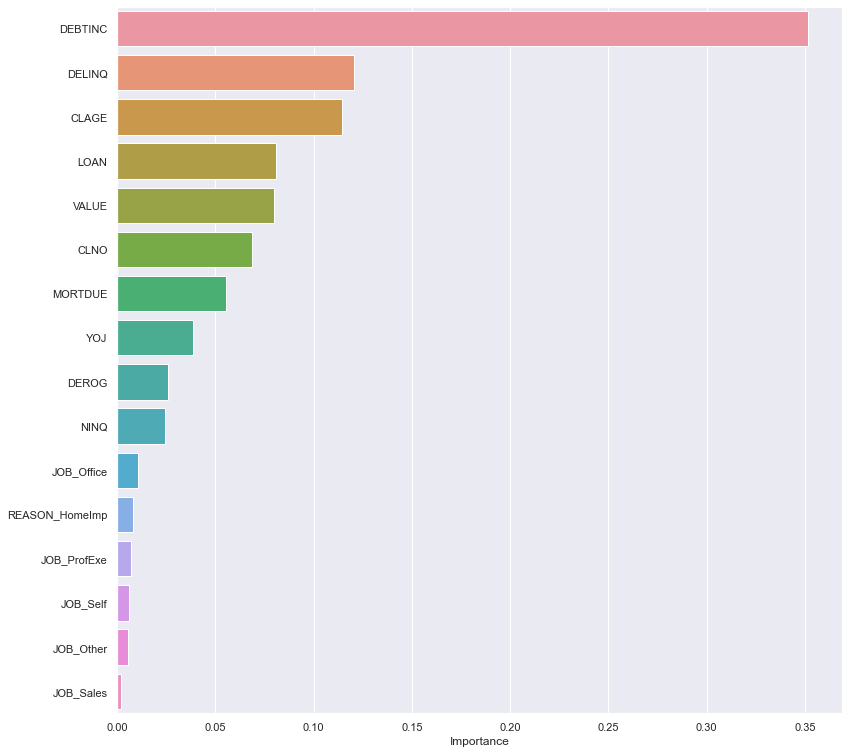

In [90]:
# Plot the feature importance

importances = d_tree.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

**Observations:**
- It seems that the most important features is clearly DEBTINC followed by CLAGE and DELINQ

Let's tune the hyperparameters and prune the decision tree to try to optimize the model performance and see if we have similar feature importance.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**max_features**

The number of features to consider when looking for the best split.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


**We kept the class_weight as we know the data is imbalanced, tuning the parameter enabled better performance using the class_weight

#### Using GridSearchCV for Hyperparameter tuning on the model

In [91]:
# Choose the type of classifier 
d_tree_tuned =  DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8},random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'max_features' : [6, 7, 8, 9, 10],
              'min_samples_leaf': [2, 3, 4, 5, 10, 20],
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1, average='weighted')

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=8, max_features=10, min_samples_leaf=3,
                       random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      3578
           1       0.71      0.87      0.78       892

    accuracy                           0.90      4470
   macro avg       0.84      0.89      0.86      4470
weighted avg       0.91      0.90      0.91      4470



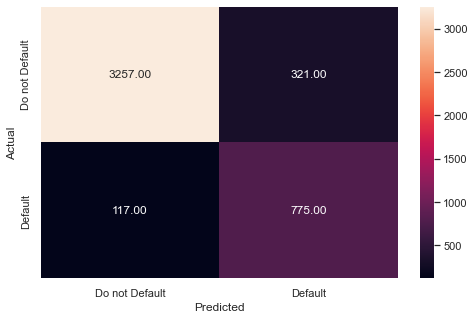

In [92]:
# Checking performance on the training data based on the tuned model
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1193
           1       0.66      0.76      0.71       297

    accuracy                           0.87      1490
   macro avg       0.80      0.83      0.81      1490
weighted avg       0.88      0.87      0.88      1490



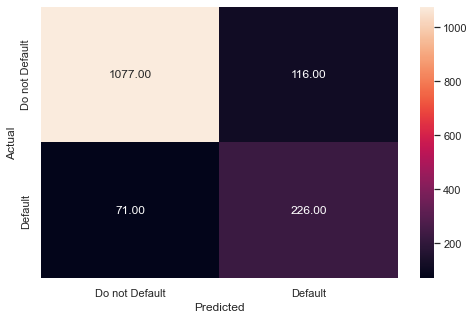

In [93]:
# Checking performance on the testing data based on the tuned model
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

#### Checking the performance on the test dataset

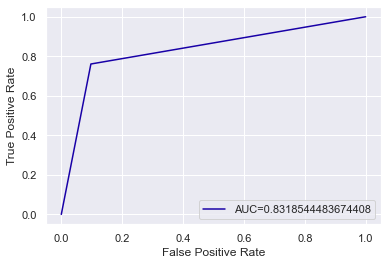

In [94]:
#define metrics
y_pred_proba = d_tree_tuned.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_test2)
auc = metrics.roc_auc_score(y_test, y_pred_test2)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Insights**:

Tuning the hyperparameters by pruning the tree improved the performance of the model.

Confusion Matrix (numbers provided for test dataset):
- **True Negative (TN):** Predicting the borrower won't default the loan and the borrower did not default the loan -> 1077
- **False Negative (FN):** Predicting the borrower won't default the loan but the borrower defaulted the loan -> 71
- **True Positive (TP):** Predicting the borrower will default the loan and the borrower defaulted the loan -> 226
- **False Positive (FP):** Predicting the borrower will default the loan and the borrower did not default the loan-> 116

Metric calculations:
- Accuracy = (TP + TN) / (TP + TN + FP + FN)               
--> 87%
---
- Recall = TP / (TP + FN)                                  
--> 76%
---
- Precision = TP / (TP + FP)                               
--> 66%
---
- F1-Score = 2 * Recall * Precision / (Recall + Precision) 
--> 71%

The Decision Tree model is not overfitting anymore as the performance on both train and test datasets are quite similar even though we lost 11% on recall from the train to test dataset, maybe there rooms for improvement here.

The accuracy is the same as the non-tuned decision tree. However, recall gained 12% compared to the previous decision tree model with a lower precision by 3%.

Let's have a look at the structure of the decision tree to better understand how it performs.

#### Plotting the feature importance for the tuned Decision Tree

<AxesSubplot:xlabel='Importance'>

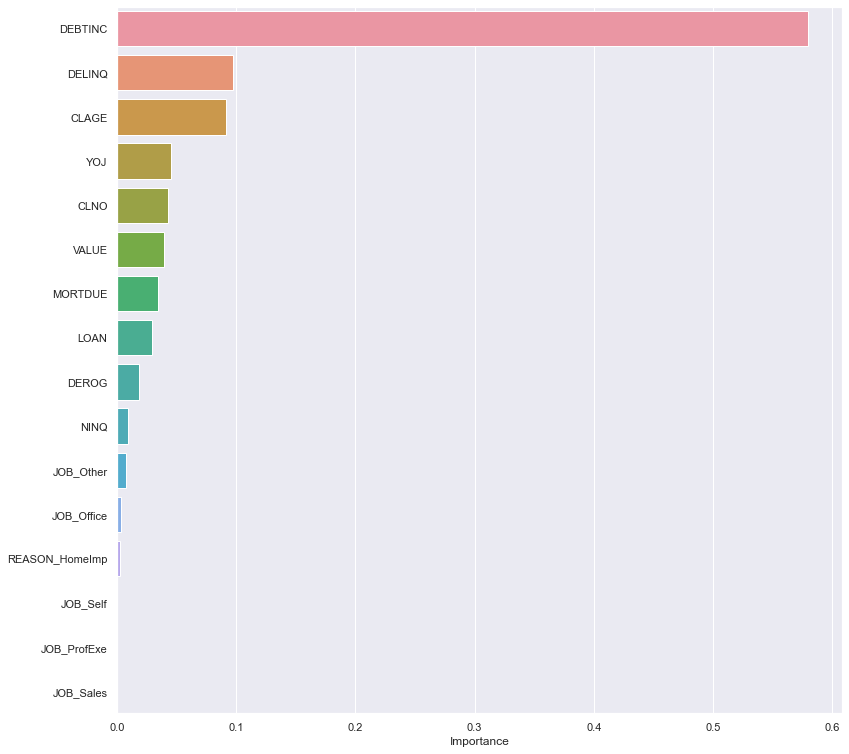

In [95]:
# Plot the feature importance

importances = d_tree_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

**Insights:**
- The tuning of hyperparameters gave even more importance to DEBTINC, followed by CLAGE, and then only VALUE, LOAN, CLNO, NINQ, YOJ

Let's have a look at the tuned decision tree structure

#### Plotting the Decision Tree Structure

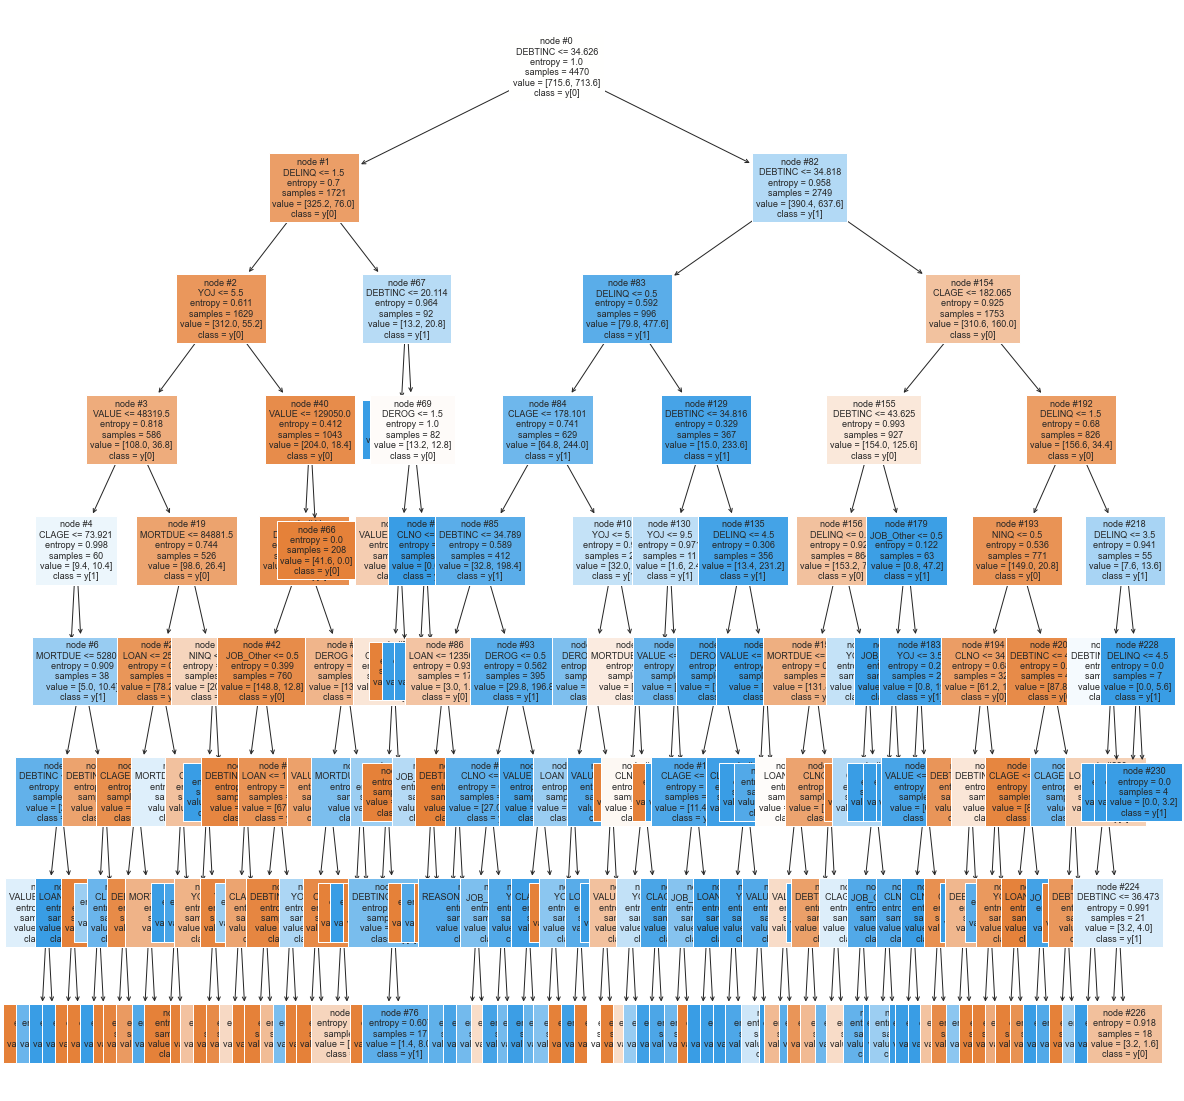

In [96]:
# Plot the decision  tree and analyze it to build the decision rule
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down:

Blue leaves represent the loan defaut, i.e., **y[1]** and the orange leaves represent the not defaulted loan i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

We can follow properly each path due to the depth of the tree but we could if necessary. We already know the most important features of the model which are DEBTINC, DELINQ, and CLAGE.

The great thing with this tuned decision tree is we have the best performing recall performance so far with a high accuracy and interpretability. 

Let's see if we can increase the performance of the model even further through a random forest classifier even though we know we won't be able to interprete the model.

### **MODEL 5 - Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [97]:
# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3578
           1       1.00      1.00      1.00       892

    accuracy                           1.00      4470
   macro avg       1.00      1.00      1.00      4470
weighted avg       1.00      1.00      1.00      4470



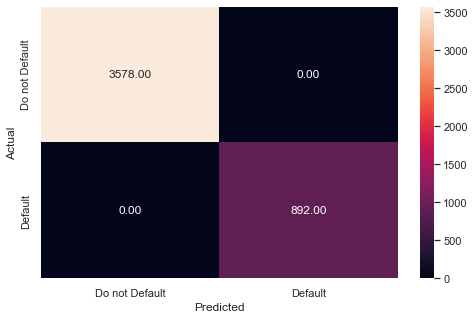

In [98]:
#Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1193
           1       0.88      0.69      0.77       297

    accuracy                           0.92      1490
   macro avg       0.90      0.83      0.86      1490
weighted avg       0.92      0.92      0.92      1490



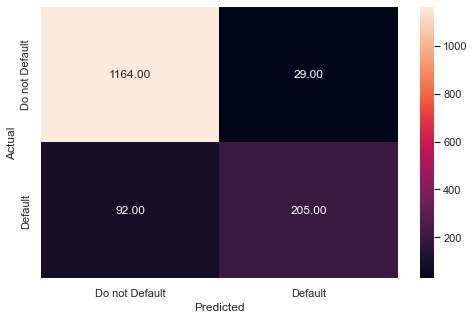

In [99]:
# Checking performance on the test data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Insights**:

The model is clearly overfitting as the performance of the metrics on the train dataset is 100% and decreased significantly on the test dataset

Confusion Matrix (numbers provided for test dataset):
- **True Negative (TN):** Predicting the borrower won't default the loan and the borrower did not default the loan -> 1164
- **False Negative (FN):** Predicting the borrower won't default the loan but the borrower defaulted the loan -> 92
- **True Positive (TP):** Predicting the borrower will default the loan and the borrower defaulted the loan -> 205
- **False Positive (FP):** Predicting the borrower will default the loan and the borrower did not default the loan-> 29

Metric calculations:
- Accuracy = (TP + TN) / (TP + TN + FP + FN)               
--> 92%
---
- Recall = TP / (TP + FN)                                  
--> 69%
---
- Precision = TP / (TP + FP)                               
--> 88%
---
- F1-Score = 2 * Recall * Precision / (Recall + Precision) 
--> 77%

The accuracy has increased by 5% to reach 92%, recall is 7% lower compared to the previous tuned decision tree model but with a higher precision of 22%.

Let's try to use class_weight to see if it changes the performance of the model

### **Build a Random Forest model with Class Weights**

In [100]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8},random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3578
           1       1.00      1.00      1.00       892

    accuracy                           1.00      4470
   macro avg       1.00      1.00      1.00      4470
weighted avg       1.00      1.00      1.00      4470



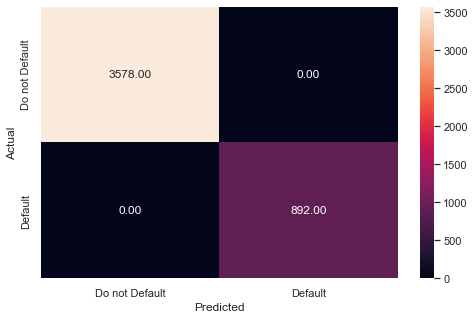

In [101]:
# Checking performance on the train data
y_pred_train4 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1193
           1       0.85      0.63      0.72       297

    accuracy                           0.90      1490
   macro avg       0.88      0.80      0.83      1490
weighted avg       0.90      0.90      0.90      1490



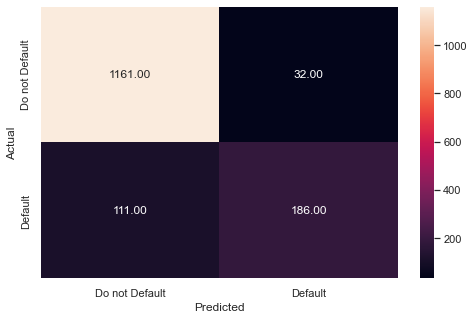

In [102]:
# Checking performance on the test data
y_pred_test4 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Insights**:

The model is still overfitting as the performance of the metrics on the train dataset is 100% and decreased significantly on the test dataset

Confusion Matrix (numbers provided for test dataset):
- **True Negative (TN):** Predicting the borrower won't default the loan and the borrower did not default the loan -> 1161
- **False Negative (FN):** Predicting the borrower won't default the loan but the borrower defaulted the loan -> 111
- **True Positive (TP):** Predicting the borrower will default the loan and the borrower defaulted the loan -> 186
- **False Positive (FP):** Predicting the borrower will default the loan and the borrower did not default the loan-> 32

Metric calculations:
- Accuracy = (TP + TN) / (TP + TN + FP + FN)               
--> 90%
---
- Recall = TP / (TP + FN)                                  
--> 63%
---
- Precision = TP / (TP + FP)                               
--> 85%
---
- F1-Score = 2 * Recall * Precision / (Recall + Precision) 
--> 72%

Recall lost an additional 6% and precision slightly decreased by 3%.

Let's try to tune the hyperparameters to see if we can improve the performance of the model for recall.

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [103]:
# first try to tune hyperparameters, took a long tme

# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8},random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
              "criterion": ['gini', 'entropy'],
              "max_depth": np.arange(2, 12),
              "min_samples_leaf": [2, 3, 4, 5,10,15,20],
              'max_features' : [6, 7, 8, 9, 10],
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=4,
                       max_features=7, min_samples_leaf=20, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3578
           1       0.57      0.83      0.68       892

    accuracy                           0.84      4470
   macro avg       0.76      0.84      0.79      4470
weighted avg       0.88      0.84      0.85      4470



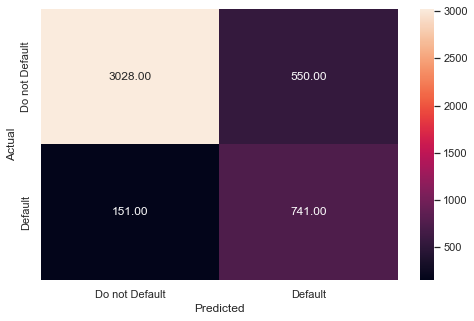

In [104]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1193
           1       0.85      0.63      0.72       297

    accuracy                           0.90      1490
   macro avg       0.88      0.80      0.83      1490
weighted avg       0.90      0.90      0.90      1490



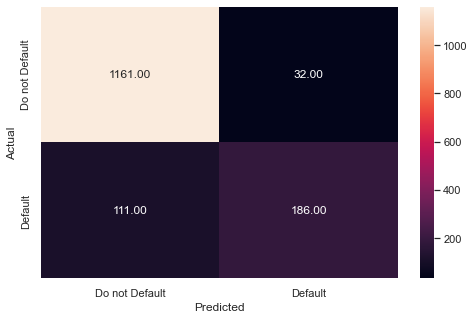

In [105]:
# Checking performace on test dataset
y_pred_test5 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Insights**:

Confusion Matrix (numbers provided for test dataset):
- **True Negative (TN):** Predicting the borrower won't default the loan and the borrower did not default the loan -> 1156
- **False Negative (FN):** Predicting the borrower won't default the loan but the borrower defaulted the loan -> 108
- **True Positive (TP):** Predicting the borrower will default the loan and the borrower defaulted the loan -> 189
- **False Positive (FP):** Predicting the borrower will default the loan and the borrower did not default the loan-> 37

Metric calculations:
- Accuracy = (TP + TN) / (TP + TN + FP + FN)               
--> 90%
---
- Recall = TP / (TP + FN)                                  
--> 64%
---
- Precision = TP / (TP + FP)                               
--> 84%
---
- F1-Score = 2 * Recall * Precision / (Recall + Precision) 
--> 72%

Tuning the hyperparameters did not really increased the performance of the model. Recall increased slightly and precision decreased slightly. Moreover, the performance of recall on the train set is better compared to the test set and all the way around for precision

Let's have a closer look at what features are considered more important from the tuned random forest model.

#### Plot the Feature importance of the tuned Random Forest

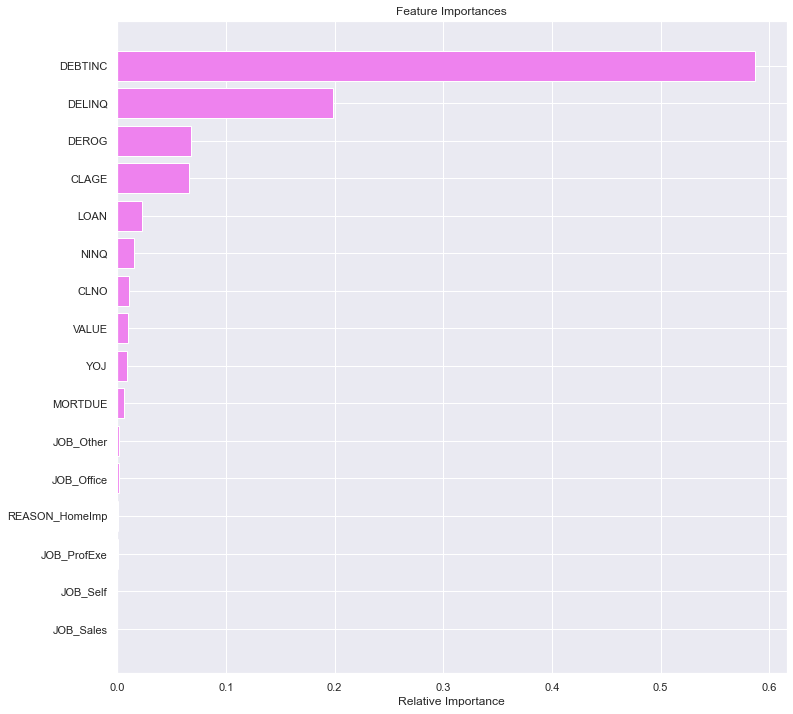

In [106]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- We can noticed that DEBTINC is still the most important feature, followed by DELINQ, and then CLAGE

# Conclusion

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

The most important features across the classification models were aligned and as follow:

#1 DEBTINC, Debt-to-income ratio
#2 DELINQ,  Number of delinquent credit lines
#3 CLAGE, Age of the oldest credits


DEBTINC is #1 and this is no surprise as the lower the ratio the higher the creditworthiness and the higher this ratio the lower creditworthiness.

DELINQ is #2 not surprising as well because it reflect past defaulting behaviours where monthly reimbursements got delayed between 30 to 60 days

CLAGE is #3 for a good reason as well as it is connected with DEBTINC: the longer the period to reimburse the loan, the lower the monthly debt payments and by extension the lower the DEBTINC and all the way around.

Depending on the borrower’s attributes on these features, the approval process will be highly influenced by it:

The lower the ratio of DEBTING, the less likely the borrower will default as it has more creditworthiness
The higher the DELINQ, the more likely the borrower will default as it has defaulting behaviours.
The higher the CLAGE, the less likely the borrower will default as it has more time to pay with a lower DEBTINC.

These features play an important roles for the classification performance of our models and by extension whether or not a customer will be eligible for a loan.

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Outliers have been treated except for DELINQ and DEROG as they are defaulting flags. 

Missing values have been filled in using median for numerical features and mode for categorical features. 

We explored different classification machine learning techniques: (1) Logistic Regression, (2) K-Nearest Neighbour, (3) K-Nearest Centroid, (4) Decision Tree, (5) Random Forest.

After having tested different Data Splits* in different notebooks, the models learned best using the 75% train 25% data split and by stratifying the sets.

We tuned the hyper parameters of the models K-Nearest Neighbour, K-Nearest-Centroid, Decision Tree, and Random Forest. 

We removed features and used the F1 score to optimise significantly the performance of logistic regression.


Looking at the benchmark (see slide 5):
Random Forest is the most accurate and precise but not interpretable (black box).
Decision Tree is the best performing model on Recall and is the best when it comes to interpretability through its structure (see appendix 1)
The least performing model is K Nearest Centroid as the accuracy and precision are the lowest.

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

As Interpretability is essential, we cannot go for the random forest even if it’s the best performing model as we won’t be able to identify the underlying reason on why a borrower were not eligible for a given loan. 

The best model is as a result the tuned decision tree that has the best performing metrics with a high interpretability.

In addition to this, the tuned decision tree has the highest performance for Recall which is is exactly what we want to maximise as a business.

We want to minimise the number of defaulters. As a result, the model need to predict accurately:

True Negatives   (TN) -> the model predicted the borrower will default and the borrower actually defaulted
False Negatives (FN) -> the model predicted the borrower won’t default but the borrower actually defaulted

In other words, the model need to prevent potential defaulting loan need in order to minimise the lost.

Moreover, this is the second model having the highest precision. Precision enable us to minimise the missed opportunities.